This research looks at the Big Five personality and imposes it onto an LLM to determine if the model can behave in the same way as what the personality suggests. To Determine this, we need real humans to take the personality test and compare their results to the results of the LLM. Suppose the LLM's responses are closely similar to a human's. In that case, one can reasonably assume that the LLM understands the personality it was provided to roleplay. 

### Modules for the Notebook

In [1]:
import numpy as np
import pandas as pd
import datashader as ds
import holoviews as hv

from IPython.display import Image
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

from sctriangulate.colors import build_custom_continuous_cmap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from holoviews.operation.datashader import datashade
from holoviews.operation import contours
from holoviews import opts, dim
from colorcet import fire


hv.extension('matplotlib')

datashade.cmap=fire[50:]

c:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

### Global Variables

In [2]:
# Need to assign each personality test a label based on the 20 personality profiles
OCEAN_PROFILES = {
    "Paranoid": [0.3825, 0.6045, 0.3260, 0.2090],
    "Schizoid": [0.3600, 0.4875, 0.0850, 0.4275],
    "Schizotypal": [0.5415, 0.4050, 0.2265, 0.4215],
    "Antisocial": [0.5390, 0.3200, 0.5250, 0.2785],
    "Borderline": [0.5770, 0.3430, 0.5050, 0.3350],
    "Histrionic": [0.6455, 0.3730, 0.7485, 0.4410],
    "Narcissistic": [0.5505, 0.4490, 0.6200, 0.2230],
    "Avoidant": [0.4170, 0.4965, 0.1575, 0.4685],
    "Dependent": [0.4415, 0.4645, 0.3845, 0.6380],
    "Obsessive-Compulsive": [0.2685, 0.8545, 0.3695, 0.4705],
    "Pronoid": [0.6175, 0.3955, 0.6740, 0.7910],
    "People-person": [0.6400, 0.5125, 0.9150, 0.5725],
    "Sensible": [0.4585, 0.5950, 0.7735, 0.5785],
    "Prosocial": [0.4610, 0.6800, 0.4750, 0.7215],
    "Straightforward": [0.4230, 0.6570, 0.4950, 0.6650],
    "Non-theatrical": [0.3545, 0.6270, 0.2515, 0.5590],
    "Unpretentious": [0.4495, 0.5510, 0.3800, 0.7770],
    "Accommodating": [0.5830, 0.5035, 0.8425, 0.5315],
    "Independent": [0.5585, 0.5355, 0.6155, 0.3620],
    "Laissez-faire": [0.7315, 0.1455, 0.6305, 0.5295]
}


LABEL_NAMES = list(OCEAN_PROFILES.keys())

OCEAN_PROFILE_CORD = list(OCEAN_PROFILES.values())



LABEL_COLORS_HEX=["#e71d43",
                  "#ff0000",
                  "#ff3700",
                  "#ff6e00",
                  "#ffa500",
                  "#ffc300",
                  "#ffe100",
                  "#ffff00",
                  "#aad500",
                  "#55aa00",
                  "#008000",
                  "#005555",
                  "#002baa",
                  "#0000ff",
                  "#1900d5",
                  "#3200ac",
                  "#4b0082",
                  "#812ba6",
                  "#b857ca",
                  "#d03a87"]

LABEL_COLORS_RGP=[[231,29,67],
                  [255,0,0],
                  [255,55,0],
                  [255,110,0],
                  [255,165,0],
                  [255,195,0],
                  [255,225,0],
                  [255,255,0],
                  [170,213,0],
                  [85,170,0],
                  [0,128,0],
                  [0,85,85],
                  [0,43,120],
                  [0,0,255],
                  [25,0,213],
                  [50,0,172],
                  [75,0,130],
                  [129,43,166],
                  [184,87,202],
                  [208,58,135]]


LABEL_CMP = []

for color in LABEL_COLORS_RGP:
    cmap = build_custom_continuous_cmap([0,0,0], color)
    LABEL_CMP.append(cmap)

In [3]:
NP_OCEAN_PROFILES = np.array([[0.3825, 0.6045, 0.3260, 0.2090],
[0.3600, 0.4875, 0.0850, 0.4275],
[0.5415, 0.4050, 0.2265, 0.4215],
[0.5390, 0.3200, 0.5250, 0.2785],
[0.5770, 0.3430, 0.5050, 0.3350],
[0.6455, 0.3730, 0.7485, 0.4410],
[0.5505, 0.4490, 0.6200, 0.2230],
[0.4170, 0.4965, 0.1575, 0.4685],
[0.4415, 0.4645, 0.3845, 0.6380],
[0.2685, 0.8545, 0.3695, 0.4705],
[0.6175, 0.3955, 0.6740, 0.7910],
[0.6400, 0.5125, 0.9150, 0.5725],
[0.4585, 0.5950, 0.7735, 0.5785],
[0.4610, 0.6800, 0.4750, 0.7215],
[0.4230, 0.6570, 0.4950, 0.6650],
[0.3545, 0.6270, 0.2515, 0.5590],
[0.4495, 0.5510, 0.3800, 0.7770],
[0.5830, 0.5035, 0.8425, 0.5315],
[0.5585, 0.5355, 0.6155, 0.3620],
[0.7315, 0.1455, 0.6305, 0.5295]])

### Functions

In [4]:
def EvaluateOceanTestResults(np_matrix_with_50_questions):
    # Each question has a direction, 1 or -1. If the direction is positive (1) then that means each response is
    # evaluated as is (1, 2, 3, 4, 5). However, if the direction is negative (-1), then each response is reversed
    # from the initial order (5, 4, 3, 2, 1). Thus, if a negative question was responded with a 5, the evaluation
    # response is 1.

    # To perform this calculation, we can simply do intercept - response, which will provide us with the correct
    # negative evaluated response, but then all positive evaluated responses are negative. Given the list of 
    # directions, we can multiply that with -1, and multiply the evaluated list thus far with that to get the 
    # proper evaluated responses.
    
    question_direction = [1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1]
    question_subtract = [0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 6, 0, 6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 6, 0, 0, 0, 0, 6, 0, 6, 0, 6, 0, 6, 0, 0, 0, 6, 0, 6, 0, 6, 0, 0, 0, 0]
    np_responses_eval = np.subtract(question_subtract, np_matrix_with_50_questions)
    np_responses_eval = np.multiply(np_responses_eval, np.multiply(question_direction, -1))

    np_ocean_eval = np.zeros((np_responses_eval.shape[0], 4), dtype=int)

    # Each row in the np_response is one entire test we need to evaluate
    row_id = 0
    for row_list in np_responses_eval:
        col_id = 0
        factor = -1
        ENACO_eval_int = [0, 0, 0, 0, 0]

        # Each column assosiates to a question response from the test. There are 10 questsions per factor, 
        # and there are 5 factors. To evaluate one factor, it is the summation of all questions. Thus the smallest
        # a single factor can be is 10, and the largest it can be is 50.
        # To calculate this, we will keep track of 10 questions that have been answered. All evaluations will be
        # added to it's associated factor. Once the 10th question has been answered, we will increment the factor
        # and continue the process so that the next 10 questions will be added to the next factor.
        
        for col_element in row_list:        
            if col_id % 10 == 0:
                factor += 1
            val = col_element
            ENACO_eval_int[factor] += val
            col_id += 1

        # Reorganize ENACO to OCEAN
        OCEAN_eval_int = [ENACO_eval_int[4],
                        ENACO_eval_int[3],
                        ENACO_eval_int[0],
                        ENACO_eval_int[2]
                        ]

        for factor_idx in range(0, 4):
            np_ocean_eval[row_id, factor_idx] = OCEAN_eval_int[factor_idx]
        row_id += 1 

    return np.interp(np_ocean_eval, xp=[10, 20, 30, 40, 50], fp=[0.0, 0.25, 0.50, 0.75, 1.0])



def calc_CSCF(ocean_matrix):
    # To graph these values in the same way as the study, we will need to calculate the Cognitive Stability 
    # (ALPHA = Agreeableness + Conscientiousness + Emotional Stability) and Cognitive Flexability (BETA = Extraversion
    # + Openness)

    np_cscf = np.zeros((ocean_matrix.shape[0], 2), dtype=float)

    row_idx = 0
    for row_list in ocean_matrix:
        O = row_list[0]
        C = row_list[1]
        E = row_list[2]
        A = row_list[3]

        ALPHA = A + C 
        BETA = E + O
        
        np_cscf[row_idx, 0] = ALPHA
        np_cscf[row_idx, 1] = BETA
        
        row_idx += 1

    return np_cscf



def GetPersonalityProfileLabels(ocean_matrix):
    np_distance_from_eval_to_profile = np.zeros((ocean_matrix.shape[0], 20), dtype=float)
    np_label = np.zeros(ocean_matrix.shape[0], dtype=float)

    row_idx = 0
    for row_OCEAN in ocean_matrix:
        col_idx = 0
        for profile_name, profile_OCEAN in OCEAN_PROFILES.items():
            distance = np.linalg.norm(profile_OCEAN-row_OCEAN)
            np_distance_from_eval_to_profile[row_idx, col_idx] = distance
            col_idx += 1
        row_idx += 1

    row_idx = 0
    for row_distances in np_distance_from_eval_to_profile:
        np_label[row_idx] = np.argmin(row_distances)
        row_idx += 1

    return np_label



def CreateFullInfoDf(np_matrix_with_50_questions, np_ocean = None, np_cscf = None, np_label = None):
    # Combine np_responses_clean, np_OCEAN, np_CSCF, and np_label

    if np.any(np_ocean) == False:
        np_ocean = EvaluateOceanTestResults(np_matrix_with_50_questions)
    
    if np.any(np_cscf) == False:
        np_cscf = calc_CSCF(np_ocean)
    
    if np.any(np_label) == False:
        np_label = GetPersonalityProfileLabels(np_ocean)

    np_all_infromation = np.concatenate((np_matrix_with_50_questions, np_ocean, np_cscf, np.reshape(np_label, (np_label.shape[0], 1))), axis = 1)

    df_all_infromation = pd.DataFrame(np_all_infromation, columns =[
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "E6",
        "E7",
        "E8",
        "E9",
        "E10",
        "A1",
        "A2",
        "A3",
        "A4",
        "A5",
        "A6",
        "A7",
        "A8",
        "A9",
        "A10",
        "C1",
        "C2",
        "C3",
        "C4",
        "C5",
        "C6",
        "C7",
        "C8",
        "C9",
        "C10",
        "O1",
        "O2",
        "O3",
        "O4",
        "O5",
        "O6",
        "O7",
        "O8",
        "O9",
        "O10",
        "Openness",
        "Conscientiousness",
        "Extraversion",
        "Agreeableness",
        "Alpha",
        "Beta",
        "Label"
    ])

    data_types = {
        "E1" : "int",
        "E2": "int",
        "E3": "int",
        "E4": "int",
        "E5": "int",
        "E6": "int",
        "E7": "int",
        "E8": "int",
        "E9": "int",
        "E10": "int",
        "A1": "int",
        "A2": "int",
        "A3": "int",
        "A4": "int",
        "A5": "int",
        "A6": "int",
        "A7": "int",
        "A8": "int",
        "A9": "int",
        "A10": "int",
        "C1": "int",
        "C2": "int",
        "C3": "int",
        "C4": "int",
        "C5": "int",
        "C6": "int",
        "C7": "int",
        "C8": "int",
        "C9": "int",
        "C10": "int",
        "O1": "int",
        "O2": "int",
        "O3": "int",
        "O4": "int",
        "O5": "int",
        "O6": "int",
        "O7": "int",
        "O8": "int",
        "O9": "int",
        "O10": "int",
        "Openness": "float",
        "Conscientiousness": "float",
        "Extraversion": "float",
        "Agreeableness": "float",
        "Alpha": "float",
        "Beta": "float",
        "Label": "int"
    }

    for col_name, dt in data_types.items():
        df_all_infromation[col_name] = df_all_infromation[col_name].astype(dt)

    return df_all_infromation



def CalcInterRaterReliability(np_matrix_with_50_questions):
    # Comparing all possible combinations of respopnses for a given label with
    # out repeat (the upper triangle), determing if the answer is exactly the same.
    total_similar_responses = 0
    total_responses_reviewed = 0
    
    for x_response_id in range(0, np_matrix_with_50_questions.shape[0]):
        np_r1 = np_matrix_with_50_questions[x_response_id]
        for y_response_id in range(x_response_id + 1, np_matrix_with_50_questions.shape[0]):
            np_r2 = np_matrix_with_50_questions[y_response_id]

            test_similarity = (np_r1==np_r2).astype(int)
            num_similar = np.sum(test_similarity)

            total_similar_responses += num_similar
            total_responses_reviewed += np_matrix_with_50_questions.shape[1]

    return total_similar_responses/total_responses_reviewed


def RootMeanSquaredError(np_array, np_predictor = None):
    total_error = np.zeros(np_array.shape)
    for idx in range(np_array.shape[0]):

        if isinstance(np_predictor, np.ndarray) == False:
            np_predictor = np.mean(np_array)

        element_difference = np.subtract(np_array[idx], np_predictor)
        element_sq = element_difference ** 2.0
        total_error[idx] = element_sq
        

    MSPE = np.mean(total_error, axis=0)
    RMSPE = np.sqrt(MSPE)
    return RMSPE
            

This data was collected (2016-2018) through an interactive on-line personality test.
The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.htm
Participants were informed that their responses would be recorded and used for research at the beginning of the test, and asked to confirm their consent at the end of the test.

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

EXT1	I am the life of the party.
EXT2	I don't talk a lot.
EXT3	I feel comfortable around people.
EXT4	I keep in the background.
EXT5	I start conversations.
EXT6	I have little to say.
EXT7	I talk to a lot of different people at parties.
EXT8	I don't like to draw attention to myself.
EXT9	I don't mind being the center of attention.
EXT10	I am quiet around strangers.
EST1	I get stressed out easily.
EST2	I am relaxed most of the time.
EST3	I worry about things.
EST4	I seldom feel blue.
EST5	I am easily disturbed.
EST6	I get upset easily.
EST7	I change my mood a lot.
EST8	I have frequent mood swings.
EST9	I get irritated easily.
EST10	I often feel blue.
AGR1	I feel little concern for others.
AGR2	I am interested in people.
AGR3	I insult people.
AGR4	I sympathize with others' feelings.
AGR5	I am not interested in other people's problems.
AGR6	I have a soft heart.
AGR7	I am not really interested in others.
AGR8	I take time out for others.
AGR9	I feel others' emotions.
AGR10	I make people feel at ease.
CSN1	I am always prepared.
CSN2	I leave my belongings around.
CSN3	I pay attention to details.
CSN4	I make a mess of things.
CSN5	I get chores done right away.
CSN6	I often forget to put things back in their proper place.
CSN7	I like order.
CSN8	I shirk my duties.
CSN9	I follow a schedule.
CSN10	I am exacting in my work.
OPN1	I have a rich vocabulary.
OPN2	I have difficulty understanding abstract ideas.
OPN3	I have a vivid imagination.
OPN4	I am not interested in abstract ideas.
OPN5	I have excellent ideas.
OPN6	I do not have a good imagination.
OPN7	I am quick to understand things.
OPN8	I use difficult words.
OPN9	I spend time reflecting on things.
OPN10	I am full of ideas.

The time spent on each question is also recorded in milliseconds. These are the variables ending in _E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.

dateload    The timestamp when the survey was started.
screenw     The width the of user's screen in pixels
screenh     The height of the user's screen in pixels
introelapse The time in seconds spent on the landing / intro page
testelapse  The time in seconds spent on the page with the survey questions
endelapse   The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)
IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions
country     The country, determined by technical information (NOT ASKED AS A QUESTION)
lat_appx_lots_of_err    approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" https://splinternews.com/how-an-internet-mapping-glitch-turned-a-random-kansas-f-1793856052 to learn about the perils of relying on this information
long_appx_lots_of_err   approximate longitude of user


In [5]:
df_test_response = pd.read_csv(r"C:/Users/Jake Klinkert/Documents/School/HumIn Game Lab/APF/Papers/LLM/personality/data sets/IPIP-FFM-data-8Nov2018/data-final.csv", delimiter='\t', header=0)
df_test_response.describe()

EXT1          EXT2          EXT3          EXT4          EXT5  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   2.648067e+00  2.773115e+00  3.288349e+00  3.140595e+00  3.276960e+00   
std    1.264407e+00  1.323943e+00  1.215006e+00  1.237442e+00  1.277593e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
50%    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
75%    4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

               EXT6          EXT7          EXT8          EXT9         EXT10  \
count  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   2.401100e+00  2.771744e+00  3.414818e+00  2.963740e+00  3.556469e+00   
std    1.225721e+00  1.400336e+00  1.271915e+00  1.346040e+00  1.305232e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00   
50%    2.000000e+00  3.000000e+00  4.000000e+00  3.000000e+00  4.000000e+00   
75%    3.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  5.000000e+00   
max    5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

       ...        OPN7_E        OPN8_E        OPN9_E       OPN10_E  \
count  ...  1.013558e+06  1.013558e+06  1.013558e+06  1.013558e+06   
mean   ...  7.689488e+03  5.423945e+03  6.325802e+03  5.336311e+03   
std    ...  5.841987e+05  2.629748e+05  4.298906e+05  4.408225e+05   
min    ... -6.181300e+04 -5.001200e+04 -9.598600e+04 -3.594871e+06   
25%    ...  2.279000e+03  2.144000e+03  2.329000e+03  1.484000e+03   
50%    ...  3.208000e+03  3.051000e+03  3.269000e+03  2.192000e+03   
75%    ...  4.729000e+03  4.469000e+03  4.785000e+03  3.362000e+03   
max    ...  3.891434e+08  1.696693e+08  3.470326e+08  3.344289e+08   

            screenw       screenh   introelapse    testelapse     endelapse  \
count  1.013275e+06  1.013275e+06  1.013275e+06  1.013558e+06  1.015341e+06   
mean   1.149510e+03  8.262611e+02  9.590748e+02  6.754233e+02  2.701410e+03   
std    5.600884e+02  1.802490e+02  5.104005e+04  2.017864e+04  1.483898e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%    4.140000e+02  7.200000e+02  5.000000e+00  1.710000e+02  9.000000e+00   
50%    1.366000e+03  7.680000e+02  1.000000e+01  2.240000e+02  1.300000e+01   
75%    1.440000e+03  9.000000e+02  3.000000e+01  3.130000e+02  1.800000e+01   
max    1.366000e+04  8.802000e+03  2.944307e+07  1.189272e+07  1.493327e+09   

                IPC  
count  1.015341e+06  
mean   1.045211e+01  
std    3.982879e+01  
min    1.000000e+00  
25%    1.000000e+00  
50%    1.000000e+00  
75%    2.000000e+00  
max    7.250000e+02  

[8 rows x 106 columns]

In the read me description, colums with the _E is an estimate in miliseconds how long the individual took to answer the question. Humansa can react between 150 to 300 miliseconds, which is faster than reading and processing that infromation. Thus, any response that took less than 300 miliseconds will be removed.

In [6]:
for col_name in df_test_response.columns:
    if col_name[-1].isdigit(): # Checks the question is answered correctly
        index_incorect_answer = df_test_response[ (df_test_response[col_name] == 0)].index
        df_test_response.drop(index_incorect_answer , inplace=True)
    elif col_name.endswith("_E"): # Checks the question response time
        index_fast_react = df_test_response[ (df_test_response[col_name] <= 300)].index
        df_test_response.drop(index_fast_react , inplace=True)
    elif col_name == "IPC": # IPC counts the number of times this IP adress was recorded
        index_multiple_responses = df_test_response[ (df_test_response[col_name] != 1)].index
        df_test_response.drop(index_multiple_responses , inplace=True)

df_test_response.dropna(inplace=True)

df_test_response.describe()

EXT1           EXT2           EXT3           EXT4  \
count  596956.000000  596956.000000  596956.000000  596956.000000   
mean        2.577153       2.847540       3.231382       3.218971   
std         1.237547       1.305606       1.191203       1.204984   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       2.000000       2.000000       2.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         3.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                EXT5           EXT6           EXT7           EXT8  \
count  596956.000000  596956.000000  596956.000000  596956.000000   
mean        3.249070       2.423182       2.711208       3.470038   
std         1.246423       1.213926       1.369857       1.238960   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       1.000000       3.000000   
50%         3.000000       2.000000       3.000000       4.000000   
75%         4.000000       3.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                EXT9          EXT10  ...        OPN7_E        OPN8_E  \
count  596956.000000  596956.000000  ...  5.969560e+05  5.969560e+05   
mean        2.954074       3.622135  ...  7.581580e+03  4.802975e+03   
std         1.324670       1.263610  ...  6.594293e+05  1.027629e+05   
min         1.000000       1.000000  ...  3.040000e+02  3.020000e+02   
25%         2.000000       3.000000  ...  2.305000e+03  2.177000e+03   
50%         3.000000       4.000000  ...  3.207000e+03  3.065000e+03   
75%         4.000000       5.000000  ...  4.677000e+03  4.451000e+03   
max         5.000000       5.000000  ...  3.891434e+08  4.676176e+07   

             OPN9_E       OPN10_E        screenw       screenh   introelapse  \
count  5.969560e+05  5.969560e+05  596956.000000  596956.00000  5.969560e+05   
mean   5.593508e+03  4.244759e+03    1118.036994     823.22208  1.034044e+03   
std    1.966684e+05  1.837864e+05     581.153802     183.54006  5.947013e+04   
min    3.010000e+02  3.020000e+02       0.000000       0.00000  0.000000e+00   
25%    2.354000e+03  1.500000e+03     375.000000     667.00000  5.000000e+00   
50%    3.260000e+03  2.196000e+03    1288.000000     768.00000  1.100000e+01   
75%    4.716000e+03  3.320000e+03    1440.000000     900.00000  3.100000e+01   
max    1.138087e+08  9.048484e+07   13660.000000    8802.00000  2.944307e+07   

         testelapse     endelapse       IPC  
count  5.969560e+05  5.969560e+05  596956.0  
mean   6.116081e+02  3.717425e+03       1.0  
std    1.624744e+04  1.934524e+06       0.0  
min    1.000000e+00  1.000000e+00       1.0  
25%    1.700000e+02  9.000000e+00       1.0  
50%    2.200000e+02  1.300000e+01       1.0  
75%    3.030000e+02  1.700000e+01       1.0  
max    5.372971e+06  1.493327e+09       1.0  

[8 rows x 106 columns]

Now we can evaluate the test results and determine each factor of OCEAN

In [7]:
np_responses_clean = df_test_response.iloc[:,:50].to_numpy()
np_OCEA = EvaluateOceanTestResults(np_responses_clean)
np_OCEA

array([[0.875, 0.55 , 0.9  , 0.725],
       [0.625, 0.675, 0.25 , 0.85 ],
       [0.775, 0.6  , 0.375, 0.8  ],
       ...,
       [0.875, 0.45 , 0.55 , 0.725],
       [0.775, 0.7  , 0.3  , 0.675],
       [0.925, 0.45 , 0.725, 0.8  ]])

In [8]:
np_CSCF = calc_CSCF(np_OCEA)
np_CSCF

array([[1.275, 1.775],
       [1.525, 0.875],
       [1.4  , 1.15 ],
       ...,
       [1.175, 1.425],
       [1.375, 1.075],
       [1.25 , 1.65 ]])

In [9]:
np_LABEL = GetPersonalityProfileLabels(np_OCEA)
np_LABEL

array([11., 16., 16., ..., 10., 13., 10.])

In [10]:
df_all_infromation = CreateFullInfoDf(np_responses_clean[:, 0:40], np_OCEA, np_CSCF, np_LABEL)
df_all_infromation.describe()

E1             E2             E3             E4  \
count  596956.000000  596956.000000  596956.000000  596956.000000   
mean        2.577153       2.847540       3.231382       3.218971   
std         1.237547       1.305606       1.191203       1.204984   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       2.000000       2.000000       2.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         3.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  E5             E6             E7             E8  \
count  596956.000000  596956.000000  596956.000000  596956.000000   
mean        3.249070       2.423182       2.711208       3.470038   
std         1.246423       1.213926       1.369857       1.238960   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       1.000000       3.000000   
50%         3.000000       2.000000       3.000000       4.000000   
75%         4.000000       3.000000       4.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                  E9            E10  ...             O8             O9  \
count  596956.000000  596956.000000  ...  596956.000000  596956.000000   
mean        2.954074       3.622135  ...       2.491172       3.160372   
std         1.324670       1.263610  ...       1.125674       1.249902   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         2.000000       3.000000  ...       2.000000       2.000000   
50%         3.000000       4.000000  ...       2.000000       3.000000   
75%         4.000000       5.000000  ...       3.000000       4.000000   
max         5.000000       5.000000  ...       5.000000       5.000000   

                 O10       Openness  Conscientiousness   Extraversion  \
count  596956.000000  596956.000000      596956.000000  596956.000000   
mean        3.628755       0.734840           0.585777       0.478526   
std         0.998212       0.154418           0.184811       0.227869   
min         1.000000       0.000000           0.000000       0.000000   
25%         3.000000       0.625000           0.450000       0.300000   
50%         4.000000       0.750000           0.575000       0.475000   
75%         4.000000       0.850000           0.725000       0.650000   
max         5.000000       1.000000           1.000000       1.000000   

       Agreeableness          Alpha           Beta          Label  
count  596956.000000  596956.000000  596956.000000  596956.000000  
mean        0.690004       1.275781       1.213366      10.794445  
std         0.184019       0.278092       0.296802       4.680353  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.575000       1.100000       1.000000      10.000000  
50%         0.725000       1.275000       1.200000      11.000000  
75%         0.825000       1.475000       1.425000      13.000000  
max         1.000000       2.000000       2.000000      19.000000  

[8 rows x 47 columns]

For the sake of time, we will perform a Disproportionate Sampling of the data, such that there is an equal distribution of labels of eaach personality profile and few to prosess and graph for the notebook.

In [11]:
N_SAMPLING = 1220

df_all_infromation_subset = df_all_infromation.groupby('Label', group_keys=False).apply(lambda x: x.sample(N_SAMPLING))
df_all_infromation_subset.describe()

E1            E2            E3            E4            E5  \
count  24400.000000  24400.000000  24400.000000  24400.000000  24400.000000   
mean       2.481680      2.964057      2.961803      3.254918      2.990410   
std        1.289514      1.371062      1.250311      1.259391      1.318679   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      2.000000      2.000000      2.000000      2.000000   
50%        2.000000      3.000000      3.000000      3.000000      3.000000   
75%        3.000000      4.000000      4.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 E6            E7            E8            E9           E10  \
count  24400.000000  24400.000000  24400.000000  24400.000000  24400.000000   
mean       2.652172      2.530738      3.421516      2.923607      3.653975   
std        1.338380      1.389582      1.307472      1.407847      1.303765   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000      2.000000      2.000000      3.000000   
50%        2.000000      2.000000      4.000000      3.000000      4.000000   
75%        4.000000      4.000000      5.000000      4.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

       ...            O8            O9          O10      Openness  \
count  ...  24400.000000  24400.000000  24400.00000  24400.000000   
mean   ...      2.643689      3.048607      3.47877      0.655507   
std    ...      1.179150      1.329645      1.08779      0.192270   
min    ...      1.000000      1.000000      1.00000      0.000000   
25%    ...      2.000000      2.000000      3.00000      0.525000   
50%    ...      3.000000      3.000000      4.00000      0.675000   
75%    ...      3.000000      4.000000      4.00000      0.800000   
max    ...      5.000000      5.000000      5.00000      1.000000   

       Conscientiousness  Extraversion  Agreeableness         Alpha  \
count       24400.000000  24400.000000   24400.000000  24400.000000   
mean            0.564280      0.448540       0.531830      1.096110   
std             0.202676      0.245211       0.215181      0.315727   
min             0.000000      0.000000       0.000000      0.000000   
25%             0.425000      0.250000       0.400000      0.875000   
50%             0.575000      0.450000       0.550000      1.125000   
75%             0.700000      0.650000       0.675000      1.300000   
max             1.000000      1.000000       1.000000      2.000000   

               Beta         Label  
count  24400.000000  24400.000000  
mean       1.104047      9.500000  
std        0.351268      5.766399  
min        0.000000      0.000000  
25%        0.850000      4.750000  
50%        1.125000      9.500000  
75%        1.375000     14.250000  
max        2.000000     19.000000  

[8 rows x 47 columns]

In [12]:
np_RESPONSES = df_all_infromation_subset.iloc[:, 0:40].to_numpy()
np_OCEAN = df_all_infromation_subset.iloc[:, 40:44].to_numpy()
np_LABEL = df_all_infromation_subset.iloc[:, -1].to_numpy()

In [13]:
DF_PROFILES = CreateFullInfoDf(np_matrix_with_50_questions=np.zeros((20, 40)), 
                               np_ocean=NP_OCEAN_PROFILES, 
                               np_cscf = calc_CSCF(NP_OCEAN_PROFILES), 
                               np_label = np.arange(20).reshape(-1,1))
DF_PROFILES

E1  E2  E3  E4  E5  E6  E7  E8  E9  E10  ...  O8  O9  O10  Openness  \
0    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.3825   
1    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.3600   
2    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.5415   
3    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.5390   
4    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.5770   
5    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.6455   
6    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.5505   
7    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.4170   
8    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.4415   
9    0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.2685   
10   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.6175   
11   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.6400   
12   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.4585   
13   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.4610   
14   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.4230   
15   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.3545   
16   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.4495   
17   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.5830   
18   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.5585   
19   0   0   0   0   0   0   0   0   0    0  ...   0   0    0    0.7315   

    Conscientiousness  Extraversion  Agreeableness   Alpha    Beta  Label  
0              0.6045        0.3260         0.2090  0.8135  0.7085      0  
1              0.4875        0.0850         0.4275  0.9150  0.4450      1  
2              0.4050        0.2265         0.4215  0.8265  0.7680      2  
3              0.3200        0.5250         0.2785  0.5985  1.0640      3  
4              0.3430        0.5050         0.3350  0.6780  1.0820      4  
5              0.3730        0.7485         0.4410  0.8140  1.3940      5  
6              0.4490        0.6200         0.2230  0.6720  1.1705      6  
7              0.4965        0.1575         0.4685  0.9650  0.5745      7  
8              0.4645        0.3845         0.6380  1.1025  0.8260      8  
9              0.8545        0.3695         0.4705  1.3250  0.6380      9  
10             0.3955        0.6740         0.7910  1.1865  1.2915     10  
11             0.5125        0.9150         0.5725  1.0850  1.5550     11  
12             0.5950        0.7735         0.5785  1.1735  1.2320     12  
13             0.6800        0.4750         0.7215  1.4015  0.9360     13  
14             0.6570        0.4950         0.6650  1.3220  0.9180     14  
15             0.6270        0.2515         0.5590  1.1860  0.6060     15  
16             0.5510        0.3800         0.7770  1.3280  0.8295     16  
17             0.5035        0.8425         0.5315  1.0350  1.4255     17  
18             0.5355        0.6155         0.3620  0.8975  1.1740     18  
19             0.1455        0.6305         0.5295  0.6750  1.3620     19  

[20 rows x 47 columns]

# Plotting Personality Test

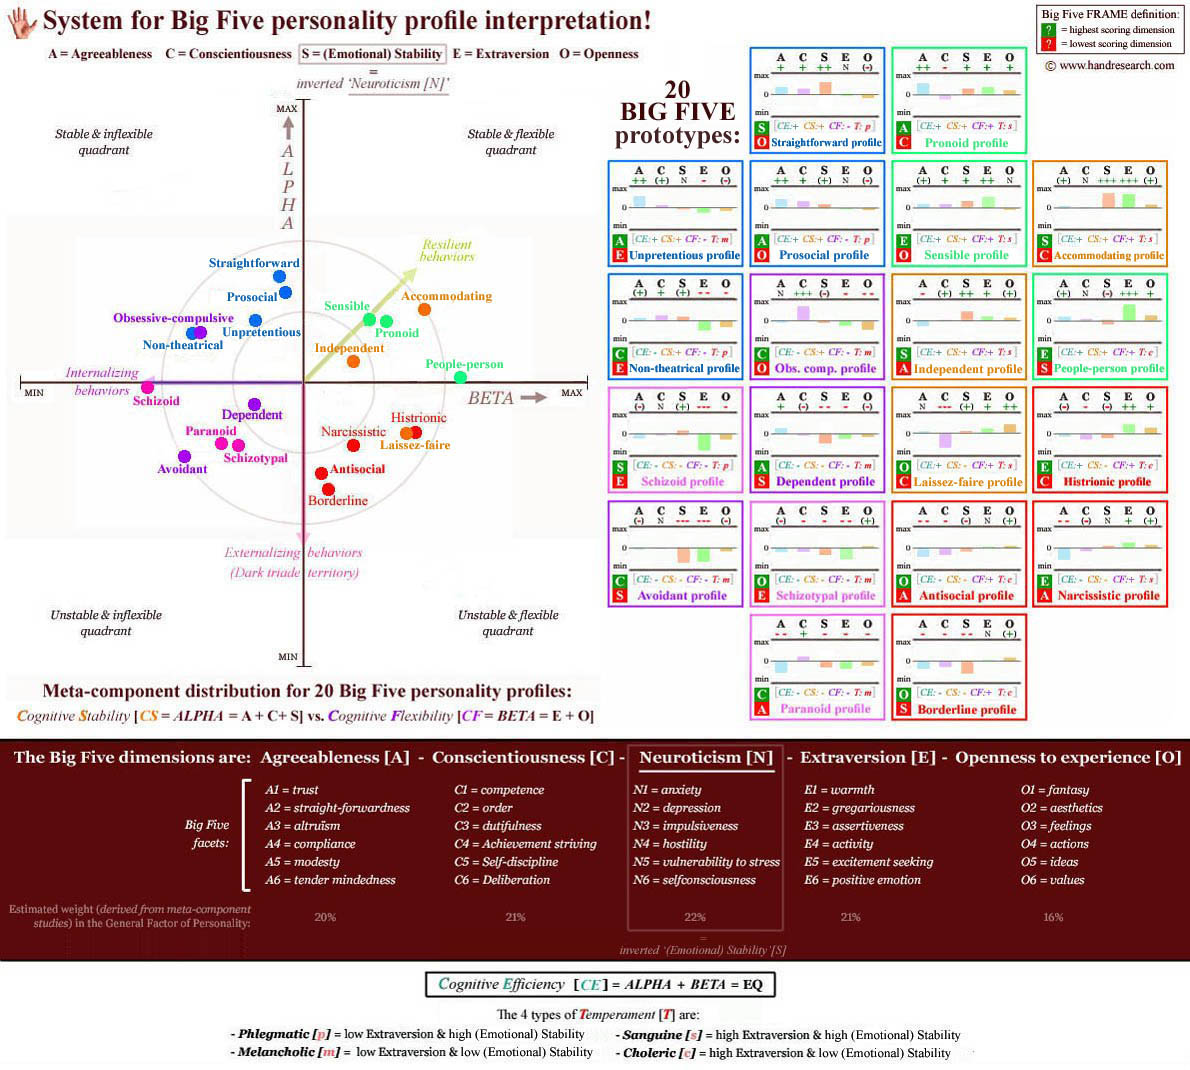

In [14]:
Image(r'C:/Users/Jake Klinkert/Documents/School/HumIn Game Lab/APF/Papers/LLM/personality/data sets/20-profiles.jpg')

:Scatter   [Alpha]   (Beta,Label)
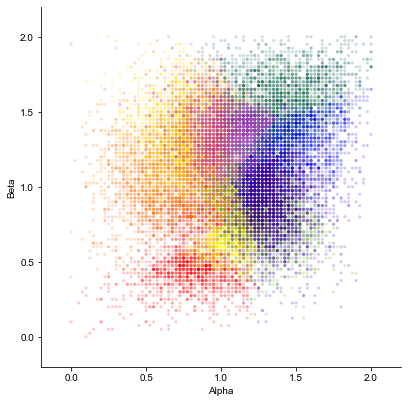

In [15]:
img =hv.Scatter(
    data=df_all_infromation_subset, kdims = ["Alpha"], vdims = ["Beta", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=10, 
       alpha=0.2,
       marker = 'o')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))

hv.save(img, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\eval_original.png", fmt="png")

img

:Layout
   .Overlay.I     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.II    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.III   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.V     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.X     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIV   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVI   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVIII :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIX   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
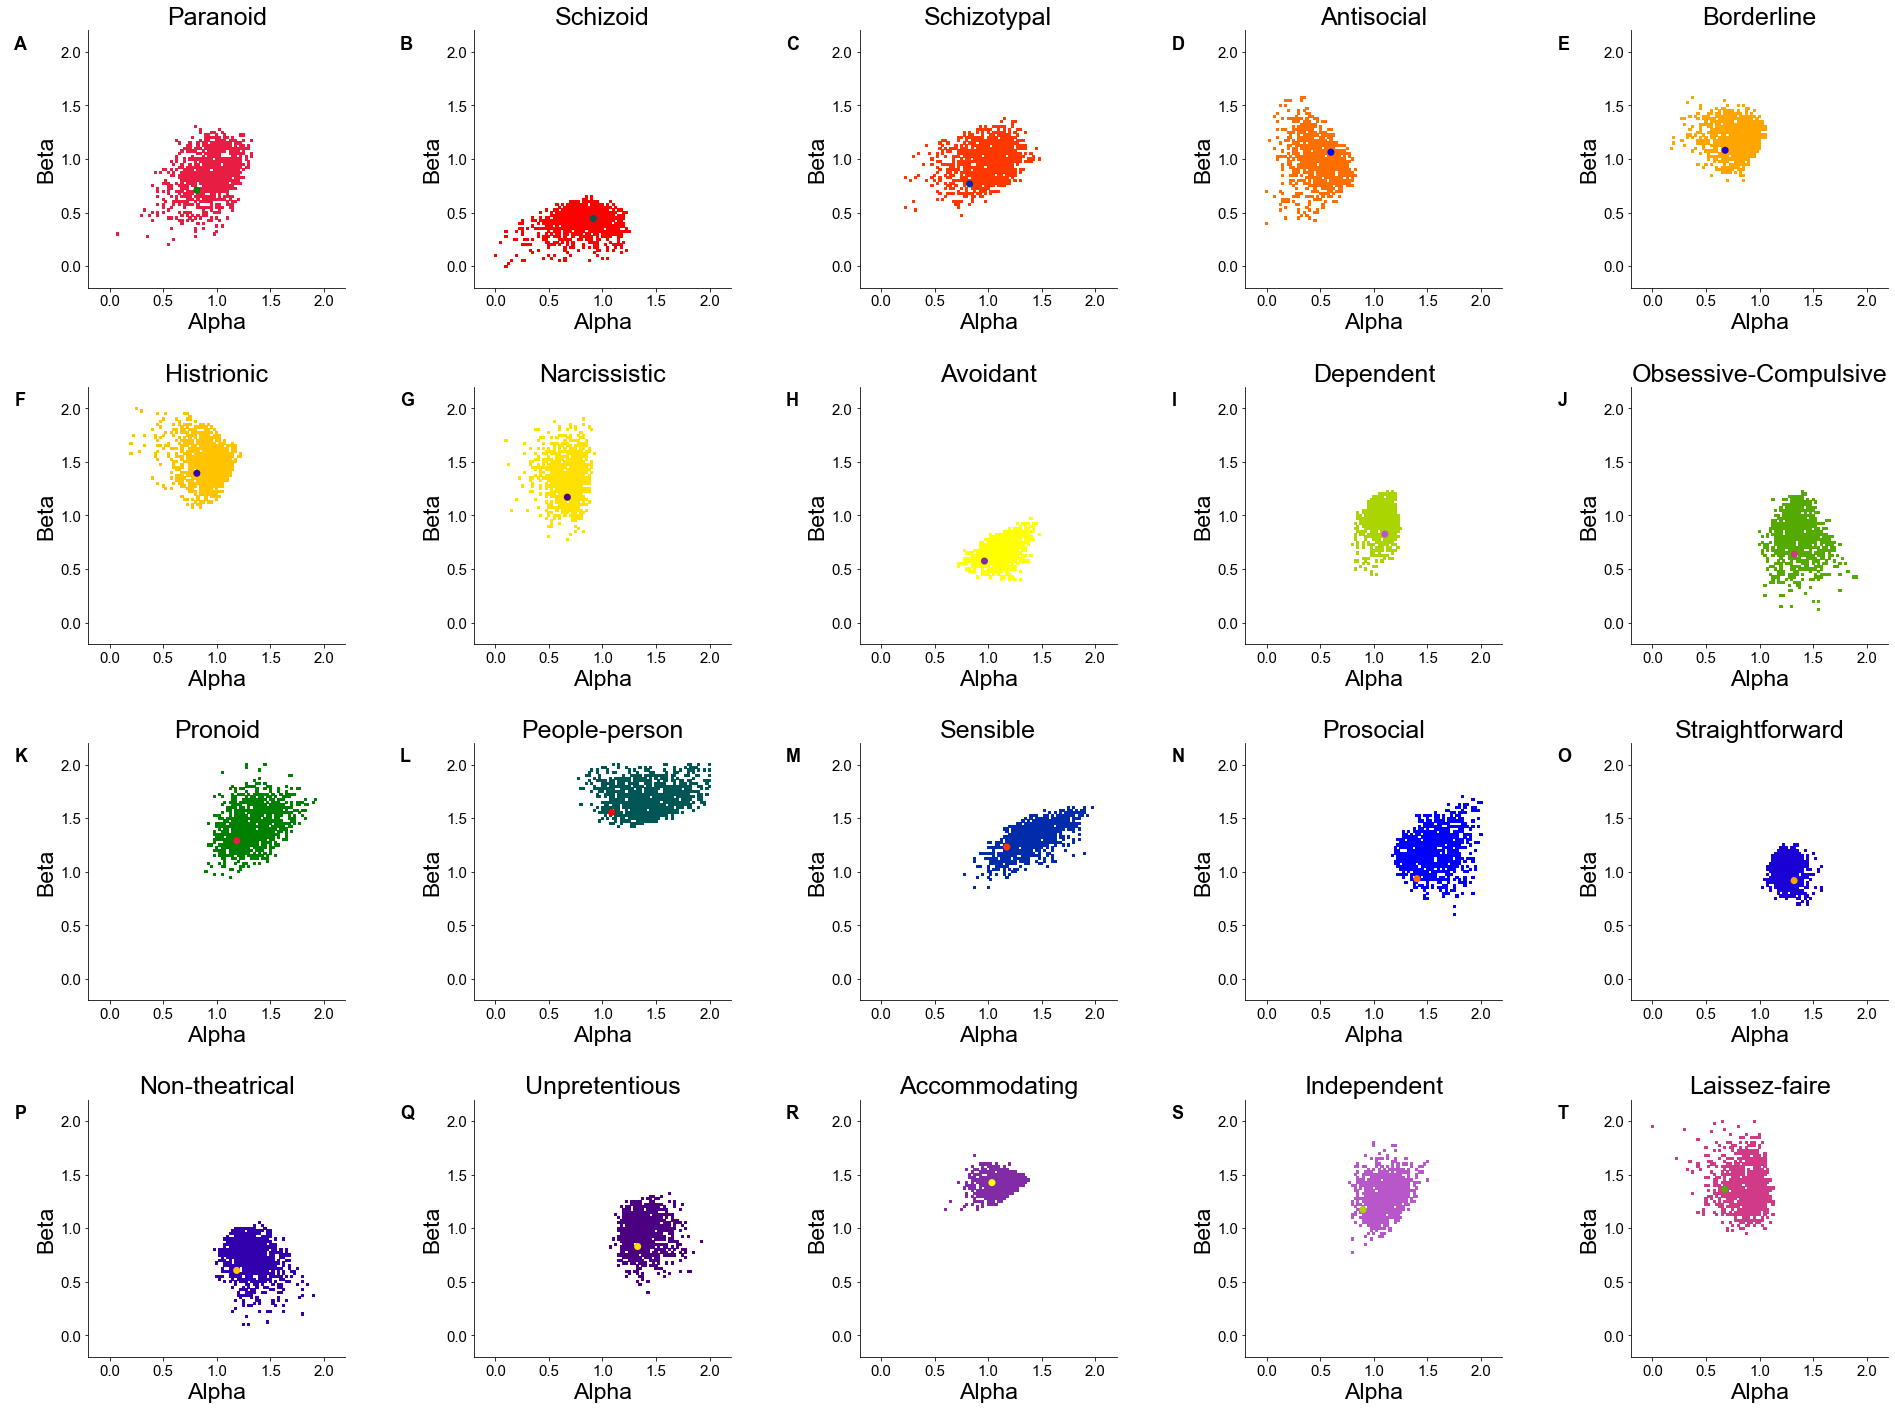

In [16]:
original_eval_imgs = [hv.Scatter(
        data=df_all_infromation_subset[df_all_infromation_subset.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]).opts(
        color='Label', 
        cmap=[LABEL_COLORS_HEX[label_idx]], 
        s=10, 
        alpha=1.0,
        marker=',',
        title=LABEL_NAMES[label_idx],
        fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

profile_eval_imgs =  [hv.Scatter(
        data=DF_PROFILES[DF_PROFILES.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]).opts(
        color='Label', 
        cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]], 
        s=50, 
        alpha=1.0,
        marker='o',
        title=LABEL_NAMES[label_idx],
        fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]


output_layout = (original_eval_imgs[0] * profile_eval_imgs[0])

for idx in range(1, 20):
    output_layout += (original_eval_imgs[idx] * profile_eval_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)


hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\eval_seperated_0riginal.png", fmt="png")

output_layout

### T-SNE

'''
tsne = TSNE(n_components=2, perplexity = 128, random_state=0, method='barnes_hut')

responses_tsne = tsne.fit_transform(np_RESPONSES)

np_tsne = np.concatenate((responses_tsne, np.reshape(np_LABEL, (np_LABEL.shape[0], 1))), axis = 1)

df_tsne = pd.DataFrame(np_tsne, columns= ["X", "Y", "Label"])
'''

'''
img = hv.Scatter(
    data=df_tsne, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=2, 
       alpha=1.0,
       marker = ',')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))
'''

'''
image_data = hv.Layout([hv.Scatter(
        data=df_tsne[df_tsne.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]).opts(
        color='Label', 
        cmap=[LABEL_COLORS_HEX[label_idx]], 
        s=2,
        alpha=1.0,
        marker = ',',
        title=LABEL_NAMES[label_idx]) for label_idx in range(0, 20)])

image_data.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1))

hv.save(image_data, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\personality\results\images\tsne_responses.png", fmt="png")

image_data
'''

## U-MAP

'''
from umap.umap_ import UMAP

### Configure UMAP hyperparameters
u_map = UMAP(n_neighbors=16, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=None, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=0.9, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.25, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

### Fit and transform the data
responses_umap = u_map.fit_transform(X=np_RESPONSES, y=np_LABEL)

np_umap = np.concatenate((responses_umap, np.reshape(np_LABEL, (np_LABEL.shape[0], 1))), axis = 1)

df_umap = pd.DataFrame(np_umap, columns= ["X", "Y", "Label"])
'''

'''
img = hv.Scatter(
    data=df_umap, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=2, 
       alpha=1.0,
       marker = ',')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))

hv.save(img, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\personality\results\images\original_umap_responses_together.png", fmt="png")

img
'''

'''
image_data = hv.Layout([hv.Scatter(
        data=df_umap[df_umap.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]).opts(
        color='Label', 
        cmap=[LABEL_COLORS_HEX[label_idx]], 
        s=5, 
        alpha=1.0,
        marker=',',
        title=LABEL_NAMES[label_idx]) for label_idx in range(0, 20)]).cols(5)

image_data.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1))

hv.save(image_data, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\personality\results\images\original_umap_responses_seperated.png", fmt="png")

image_data
'''

## LDA

In [17]:
lda = LinearDiscriminantAnalysis(solver='eigen', 
                                 shrinkage="auto", 
                                 priors=None, 
                                 n_components=2, 
                                 store_covariance=False, 
                                 tol=0.0000001, 
                                 covariance_estimator=None)

responses_lda = lda.fit_transform(X=np_RESPONSES, y=np_LABEL)

np_lda = np.concatenate((responses_lda, np.reshape(np_LABEL, (np_LABEL.shape[0], 1))), axis = 1)

df_lda = pd.DataFrame(np_lda, columns= ["X", "Y", "Label"])

:Scatter   [X]   (Y,Label)
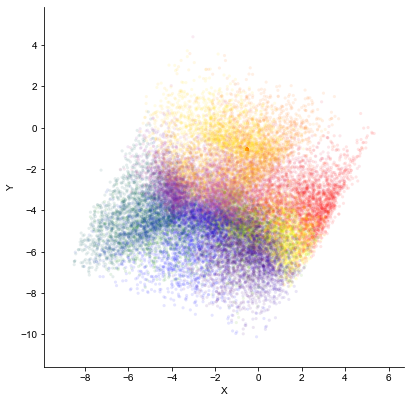

In [18]:
img = hv.Scatter(
    data=df_lda, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=10, 
       alpha=0.1,
       marker = 'o')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))

hv.save(img, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\responses_original.png", fmt="png")

img

:Layout
   .Scatter.I     :Scatter   [X]   (Y,Label)
   .Scatter.II    :Scatter   [X]   (Y,Label)
   .Scatter.III   :Scatter   [X]   (Y,Label)
   .Scatter.IV    :Scatter   [X]   (Y,Label)
   .Scatter.V     :Scatter   [X]   (Y,Label)
   .Scatter.VI    :Scatter   [X]   (Y,Label)
   .Scatter.VII   :Scatter   [X]   (Y,Label)
   .Scatter.VIII  :Scatter   [X]   (Y,Label)
   .Scatter.IX    :Scatter   [X]   (Y,Label)
   .Scatter.X     :Scatter   [X]   (Y,Label)
   .Scatter.XI    :Scatter   [X]   (Y,Label)
   .Scatter.XII   :Scatter   [X]   (Y,Label)
   .Scatter.XIII  :Scatter   [X]   (Y,Label)
   .Scatter.XIV   :Scatter   [X]   (Y,Label)
   .Scatter.XV    :Scatter   [X]   (Y,Label)
   .Scatter.XVI   :Scatter   [X]   (Y,Label)
   .Scatter.XVII  :Scatter   [X]   (Y,Label)
   .Scatter.XVIII :Scatter   [X]   (Y,Label)
   .Scatter.XIX   :Scatter   [X]   (Y,Label)
   .Scatter.XX    :Scatter   [X]   (Y,Label)
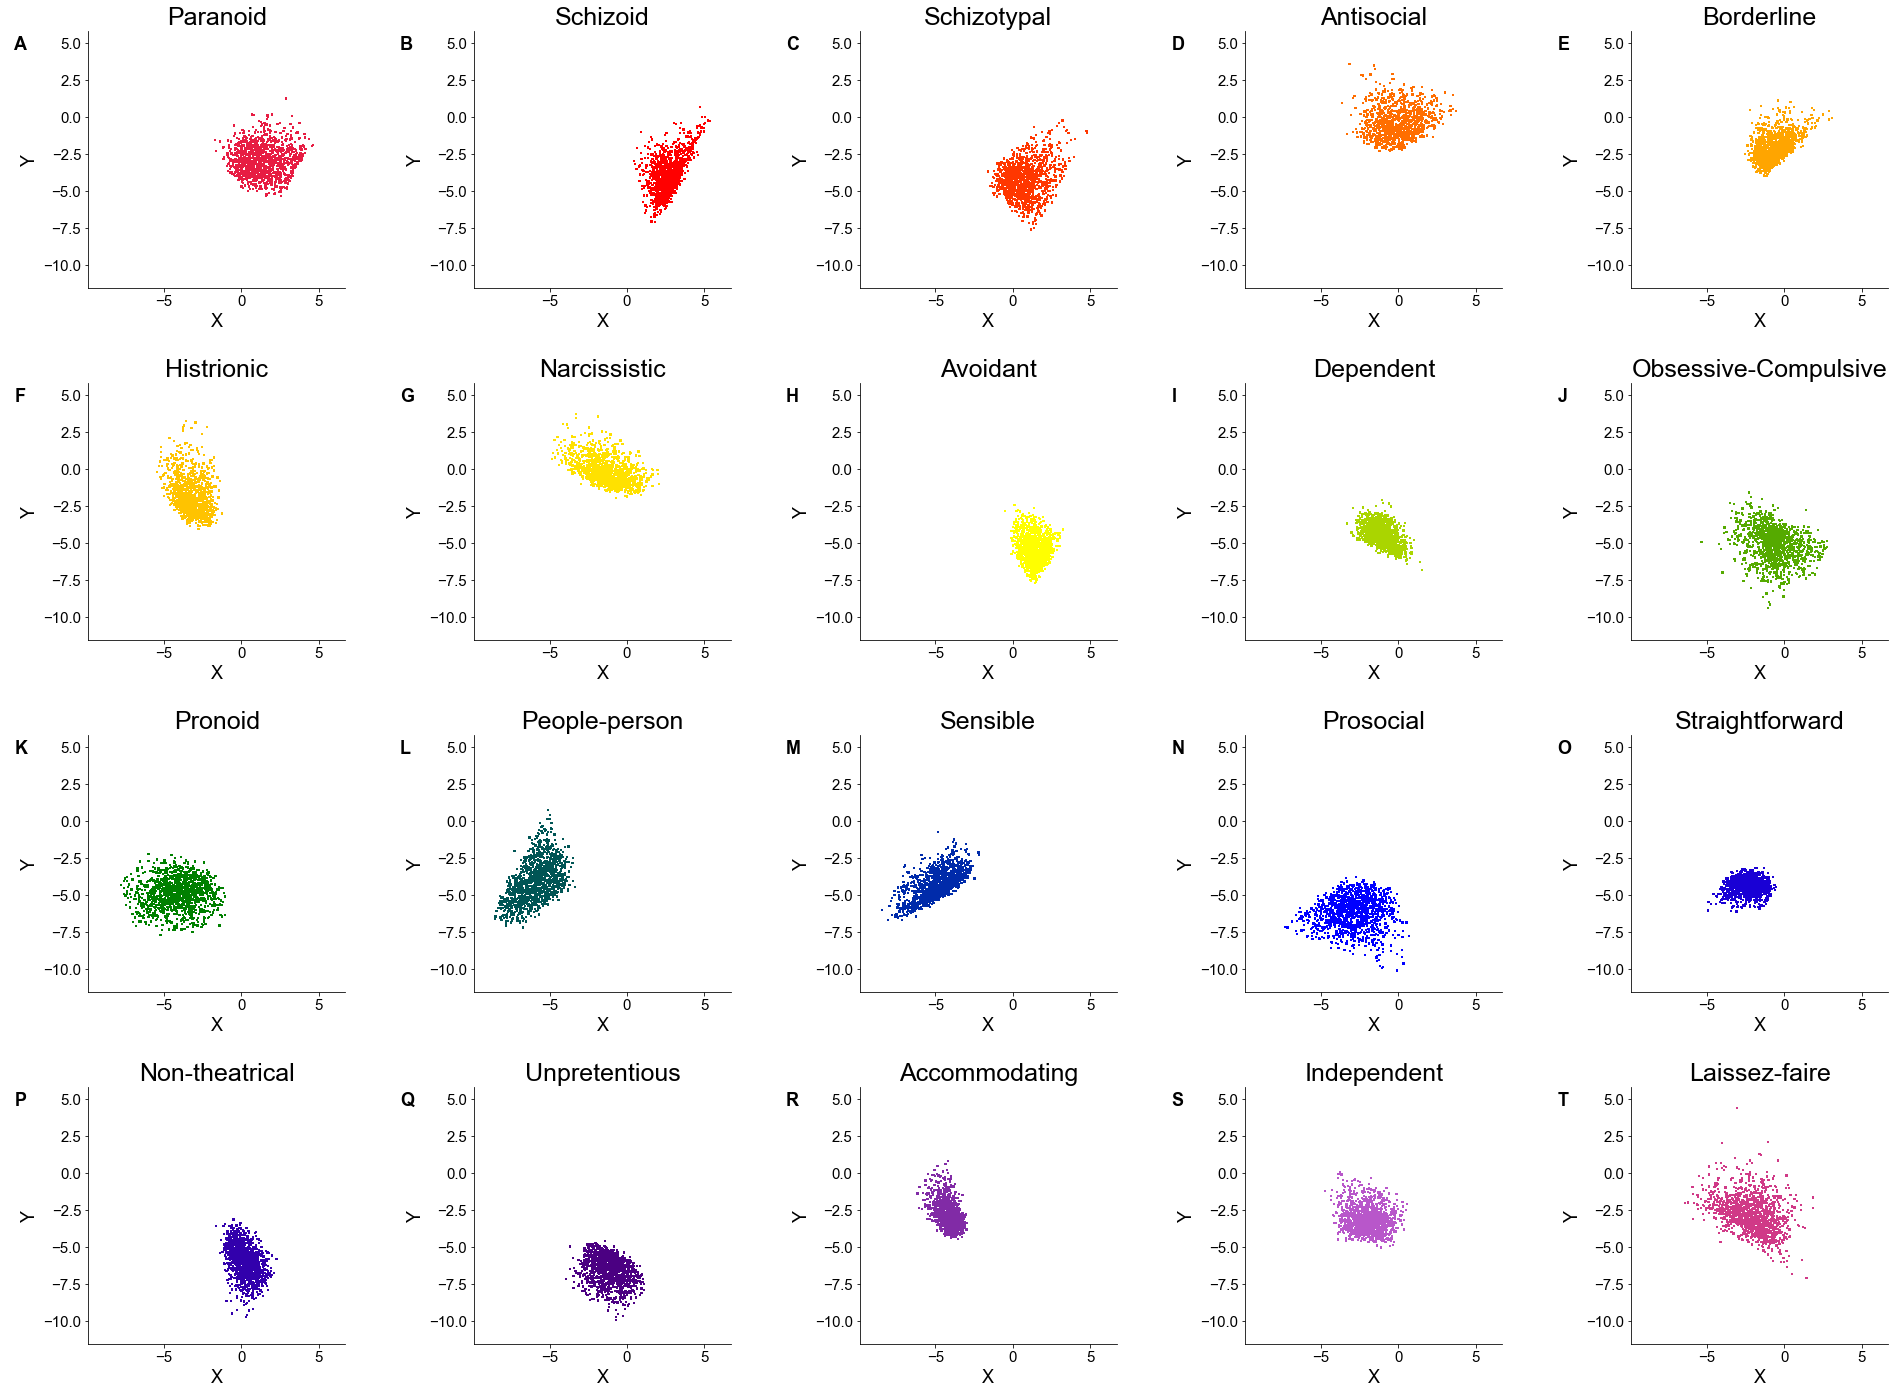

In [19]:
image_data = hv.Layout([hv.Scatter(
        data=df_lda[df_lda.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]).opts(
        color='Label', 
        cmap=[LABEL_COLORS_HEX[label_idx]], 
        s=5, 
        alpha=1.0,
        marker=',',
        title=LABEL_NAMES[label_idx],fontsize={'title': 25, 
                  'labels': 18, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]).cols(5)

image_data.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1))

hv.save(image_data, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\responses_seperated_0riginal.png", fmt="png")

image_data

## Inter-rater reliability (against response)

In [20]:
irr_original = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_all_infromation_subset[df_all_infromation_subset.Label == label_idx]
    np_label_subset = df_label_subset.iloc[:, 0:40].to_numpy()

    irr = CalcInterRaterReliability(np_label_subset)
    irr_original[label_idx] = irr
    print(f"{LABEL_NAMES[label_idx]}: {irr}")

Paranoid: 0.3106132411678479
Schizoid: 0.3603811912478651
Schizotypal: 0.2803366774701112
Antisocial: 0.2738813727995266
Borderline: 0.2622937707607687
Histrionic: 0.2647240078537904
Narcissistic: 0.2965786253177154
Avoidant: 0.3271644320122648
Dependent: 0.29069883941419333
Obsessive-Compulsive: 0.3267780631799782
Pronoid: 0.2920523406716067
People-person: 0.32100640137710296
Sensible: 0.2984391936416574
Prosocial: 0.2982787557659463
Straightforward: 0.2886365134012023
Non-theatrical: 0.30842187899245554
Unpretentious: 0.30988192417864685
Accommodating: 0.28816948856224534
Independent: 0.26156776583870145
Laissez-faire: 0.27585641953226914


## Root Mean Squared Prediction Error (againstg Personality Facttors)

In [21]:
rmspe_facttors_original = np.zeros((20, 4))

for label_idx in range(0, 20):
    df_label_subset = df_all_infromation_subset[df_all_infromation_subset.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    rmspe = RootMeanSquaredError(np_array = np_ocean_subset, np_predictor = OCEAN_estimate)
    rmspe_facttors_original[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")

Paranoid: [0.31362519 0.19546866 0.15789995 0.10140436]
Schizoid: [0.1185193  0.16861751 0.0678837  0.14356091]
Schizotypal: [0.26263762 0.17098557 0.09822313 0.15744774]
Antisocial: [0.18641686 0.11811532 0.1278547  0.12546437]
Borderline: [0.22223636 0.10134396 0.09883751 0.12219517]
Histrionic: [0.20616394 0.11290848 0.12029198 0.11058792]
Narcissistic: [0.26818555 0.1411957  0.14888348 0.10430716]
Avoidant: [0.18583144 0.15269396 0.08787041 0.13094156]
Dependent: [0.18004666 0.09941202 0.08973506 0.07255724]
Obsessive-Compulsive: [0.26199979 0.08745118 0.15193588 0.11225686]
Pronoid: [0.21446201 0.17448062 0.14319723 0.107228  ]
People-person: [0.22424144 0.24174591 0.10575063 0.21531834]
Sensible: [0.15175461 0.16942707 0.08561851 0.1625061 ]
Prosocial: [0.29844528 0.14492826 0.13888276 0.123842  ]
Straightforward: [0.11309979 0.0825621  0.07577131 0.0940581 ]
Non-theatrical: [0.22170373 0.1434239  0.1107406  0.10593   ]
Unpretentious: [0.28029574 0.11002662 0.1476052  0.09051279]

## RMSE of Euclidean Distance (against Personality)

In [22]:
rmspe_distance_original = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_all_infromation_subset[df_all_infromation_subset.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    # Get the distance between the labeld point and the instance
    np_distance_subset = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]):
        np_distance_subset[idx] = np.linalg.norm(np_ocean_subset[idx] - OCEAN_estimate)

    # Calc the avgerage prediction distance
    np_avg_distance = np.mean(np_distance_subset)
    
    rmspe = RootMeanSquaredError(np_array = np_distance_subset, np_predictor = np_avg_distance)
    rmspe_distance_original[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")   

Paranoid: [0.15611327]
Schizoid: [0.1026219]
Schizotypal: [0.12382426]
Antisocial: [0.10381493]
Borderline: [0.09840303]
Histrionic: [0.091319]
Narcissistic: [0.12744601]
Avoidant: [0.11139667]
Dependent: [0.07956382]
Obsessive-Compulsive: [0.10623357]
Pronoid: [0.1066303]
People-person: [0.12655927]
Sensible: [0.10356987]
Prosocial: [0.12677303]
Straightforward: [0.05694764]
Non-theatrical: [0.11584455]
Unpretentious: [0.12215494]
Accommodating: [0.07935015]
Independent: [0.12541231]
Laissez-faire: [0.09657925]


## RMSE Cosine Similarity (against Personality)

In [23]:
rmspe_cos_original = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_all_infromation_subset[df_all_infromation_subset.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])
    
    # Calculate the Cosine Similarity for each personality result
    np_cos_similarity = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]): 
        dot_product = np.dot(np_ocean_subset[idx], OCEAN_estimate)
        norm_instant = np.linalg.norm(np_ocean_subset[idx])
        norm_predict = np.linalg.norm(OCEAN_estimate)
        np_cos_similarity[idx] = dot_product/(norm_instant*norm_predict)

    # Calculate the Avg Cosine Similarity
    avg_cos_similarity = np.mean(np_cos_similarity)

    rmspe = RootMeanSquaredError(np_array = np_cos_similarity, np_predictor = avg_cos_similarity)
    rmspe_cos_original[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")   

Paranoid: [0.03592881]
Schizoid: [0.05206827]
Schizotypal: [0.02669195]
Antisocial: [0.03925398]
Borderline: [0.02328745]
Histrionic: [0.01359518]
Narcissistic: [0.02932391]
Avoidant: [0.01718491]
Dependent: [0.01592377]
Obsessive-Compulsive: [0.02225236]
Pronoid: [0.01398547]
People-person: [0.01153754]
Sensible: [0.00772805]
Prosocial: [0.0188734]
Straightforward: [0.00760312]
Non-theatrical: [0.01727966]
Unpretentious: [0.02108425]
Accommodating: [0.01000535]
Independent: [0.02037349]
Laissez-faire: [0.02297185]


--------------------

# Compairing with LLMs

## Clean Data Sheets

## GPT-3  Turbo

In [24]:
np_turbo_response = np.zeros((2560,50), dtype=int)
r_idx = 0
for label_idx in range(20):
    df = pd.read_csv(f'C:/Users/Jake Klinkert/Documents/School/HumIn Game Lab/APF/Papers/LLM/personality/notebooks/personality/results/original_128/model_gpt-3.5-turbo_128/post/{LABEL_NAMES[label_idx]}.csv')
    df_T = df.transpose(copy=True)

    factors_id = 0
    for index, row in df_T.iterrows():
        question_idx = 0
        for row_element in row:
            if factors_id < 5:
                factors_id += 1
                continue
            
            factors_id += 1
            factor_list = row_element.split(';')
            for response_idx in range(10):
                response = factor_list[response_idx][-1]
                np_turbo_response[r_idx, question_idx] = int(response)
                question_idx += 1
        if factors_id > 5:
            r_idx += 1
                    
print(np_turbo_response)

[[3 4 2 ... 2 4 3]
 [2 3 2 ... 2 3 3]
 [2 3 2 ... 2 3 4]
 ...
 [4 2 4 ... 3 4 4]
 [4 3 4 ... 1 3 5]
 [4 2 4 ... 3 3 4]]


In [25]:
np_turbo_OCEA = EvaluateOceanTestResults(np_turbo_response)
np_turbo_OCEA

array([[0.65 , 0.8  , 0.3  , 0.45 ],
       [0.5  , 0.75 , 0.35 , 0.75 ],
       [0.625, 0.725, 0.475, 0.675],
       ...,
       [0.7  , 0.725, 0.75 , 0.675],
       [0.7  , 0.625, 0.725, 0.75 ],
       [0.7  , 0.625, 0.725, 0.7  ]])

In [26]:
np_turbo_CSCF = calc_CSCF(np_turbo_OCEA)
np_turbo_CSCF


array([[1.25 , 0.95 ],
       [1.5  , 0.85 ],
       [1.4  , 1.1  ],
       ...,
       [1.4  , 1.45 ],
       [1.375, 1.425],
       [1.325, 1.425]])

In [27]:
np_llm_label = np.repeat(np.arange(20),128)

In [28]:
compare_array = np_llm_label == GetPersonalityProfileLabels(np_turbo_OCEA)
turbo_accuracy = sum(compare_array)/compare_array.shape[0]
turbo_accuracy

0.13671875

In [29]:
df_turbo_all_infromation = CreateFullInfoDf(np_turbo_response[:,0:40], np_turbo_OCEA, np_turbo_CSCF, np_llm_label)
df_turbo_all_infromation.describe()

E1           E2           E3           E4           E5  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000   
mean      3.360937     2.397266     3.426953     2.297656     3.242969   
std       0.992054     0.809040     1.216395     0.769989     1.265293   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       4.000000     2.000000     4.000000     2.000000     3.000000   
75%       4.000000     3.000000     4.000000     3.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                E6           E7           E8           E9          E10  ...  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000  ...   
mean      2.384375     3.457422     2.717578     3.104297     2.840625  ...   
std       0.810679     1.369768     0.953144     1.059237     0.962967  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       2.000000     2.000000     2.000000     2.000000     2.000000  ...   
50%       2.000000     4.000000     3.000000     3.000000     3.000000  ...   
75%       3.000000     5.000000     3.000000     4.000000     4.000000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

                O8           O9          O10     Openness  Conscientiousness  \
count  2560.000000  2560.000000  2560.000000  2560.000000        2560.000000   
mean      1.788281     3.546094     3.666797     0.657744           0.692773   
std       0.541822     0.837888     0.768869     0.085016           0.064686   
min       1.000000     1.000000     1.000000     0.325000           0.200000   
25%       1.000000     3.000000     3.000000     0.600000           0.650000   
50%       2.000000     4.000000     4.000000     0.675000           0.700000   
75%       2.000000     4.000000     4.000000     0.725000           0.725000   
max       4.000000     5.000000     5.000000     0.850000           0.900000   

       Extraversion  Agreeableness        Alpha         Beta        Label  
count   2560.000000    2560.000000  2560.000000  2560.000000  2560.000000  
mean       0.598877       0.722813     1.415586     1.256621     9.500000  
std        0.188109       0.077532     0.110978     0.254410     5.767408  
min        0.075000       0.425000     0.975000     0.500000     0.000000  
25%        0.425000       0.675000     1.350000     1.050000     4.750000  
50%        0.650000       0.725000     1.425000     1.325000     9.500000  
75%        0.750000       0.775000     1.500000     1.475000    14.250000  
max        0.975000       0.950000     1.725000     1.750000    19.000000  

[8 rows x 47 columns]

### Visualize Synthetic data

:Scatter   [Alpha]   (Beta,Label)
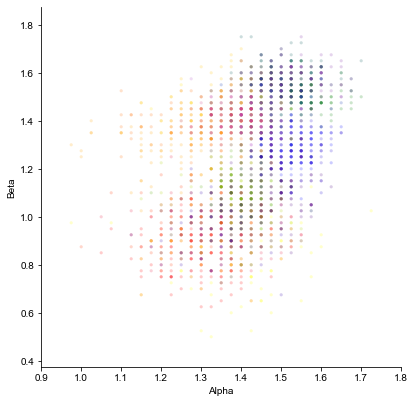

In [30]:
img =hv.Scatter(
    data=df_turbo_all_infromation, kdims = ["Alpha"], vdims = ["Beta", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=10, 
       alpha=0.2,
       marker = 'o')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))

In [31]:
turbo_eval_imgs = [hv.Scatter(data=df_turbo_all_infromation[df_turbo_all_infromation.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=f"eval-turbo: {LABEL_NAMES[label_idx]}",
                              marker='o',
                              fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

original_eval_imgs =  [hv.Scatter(data=df_all_infromation_subset[df_all_infromation_subset.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=10, 
                                    alpha=1.0,
                                    #title=f"eval-turbo: {LABEL_NAMES[label_idx]}",
                                    marker=',',
                                    fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

:Layout
   .Overlay.I     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.II    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.III   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.V     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.X     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIV   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVI   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVIII :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIX   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
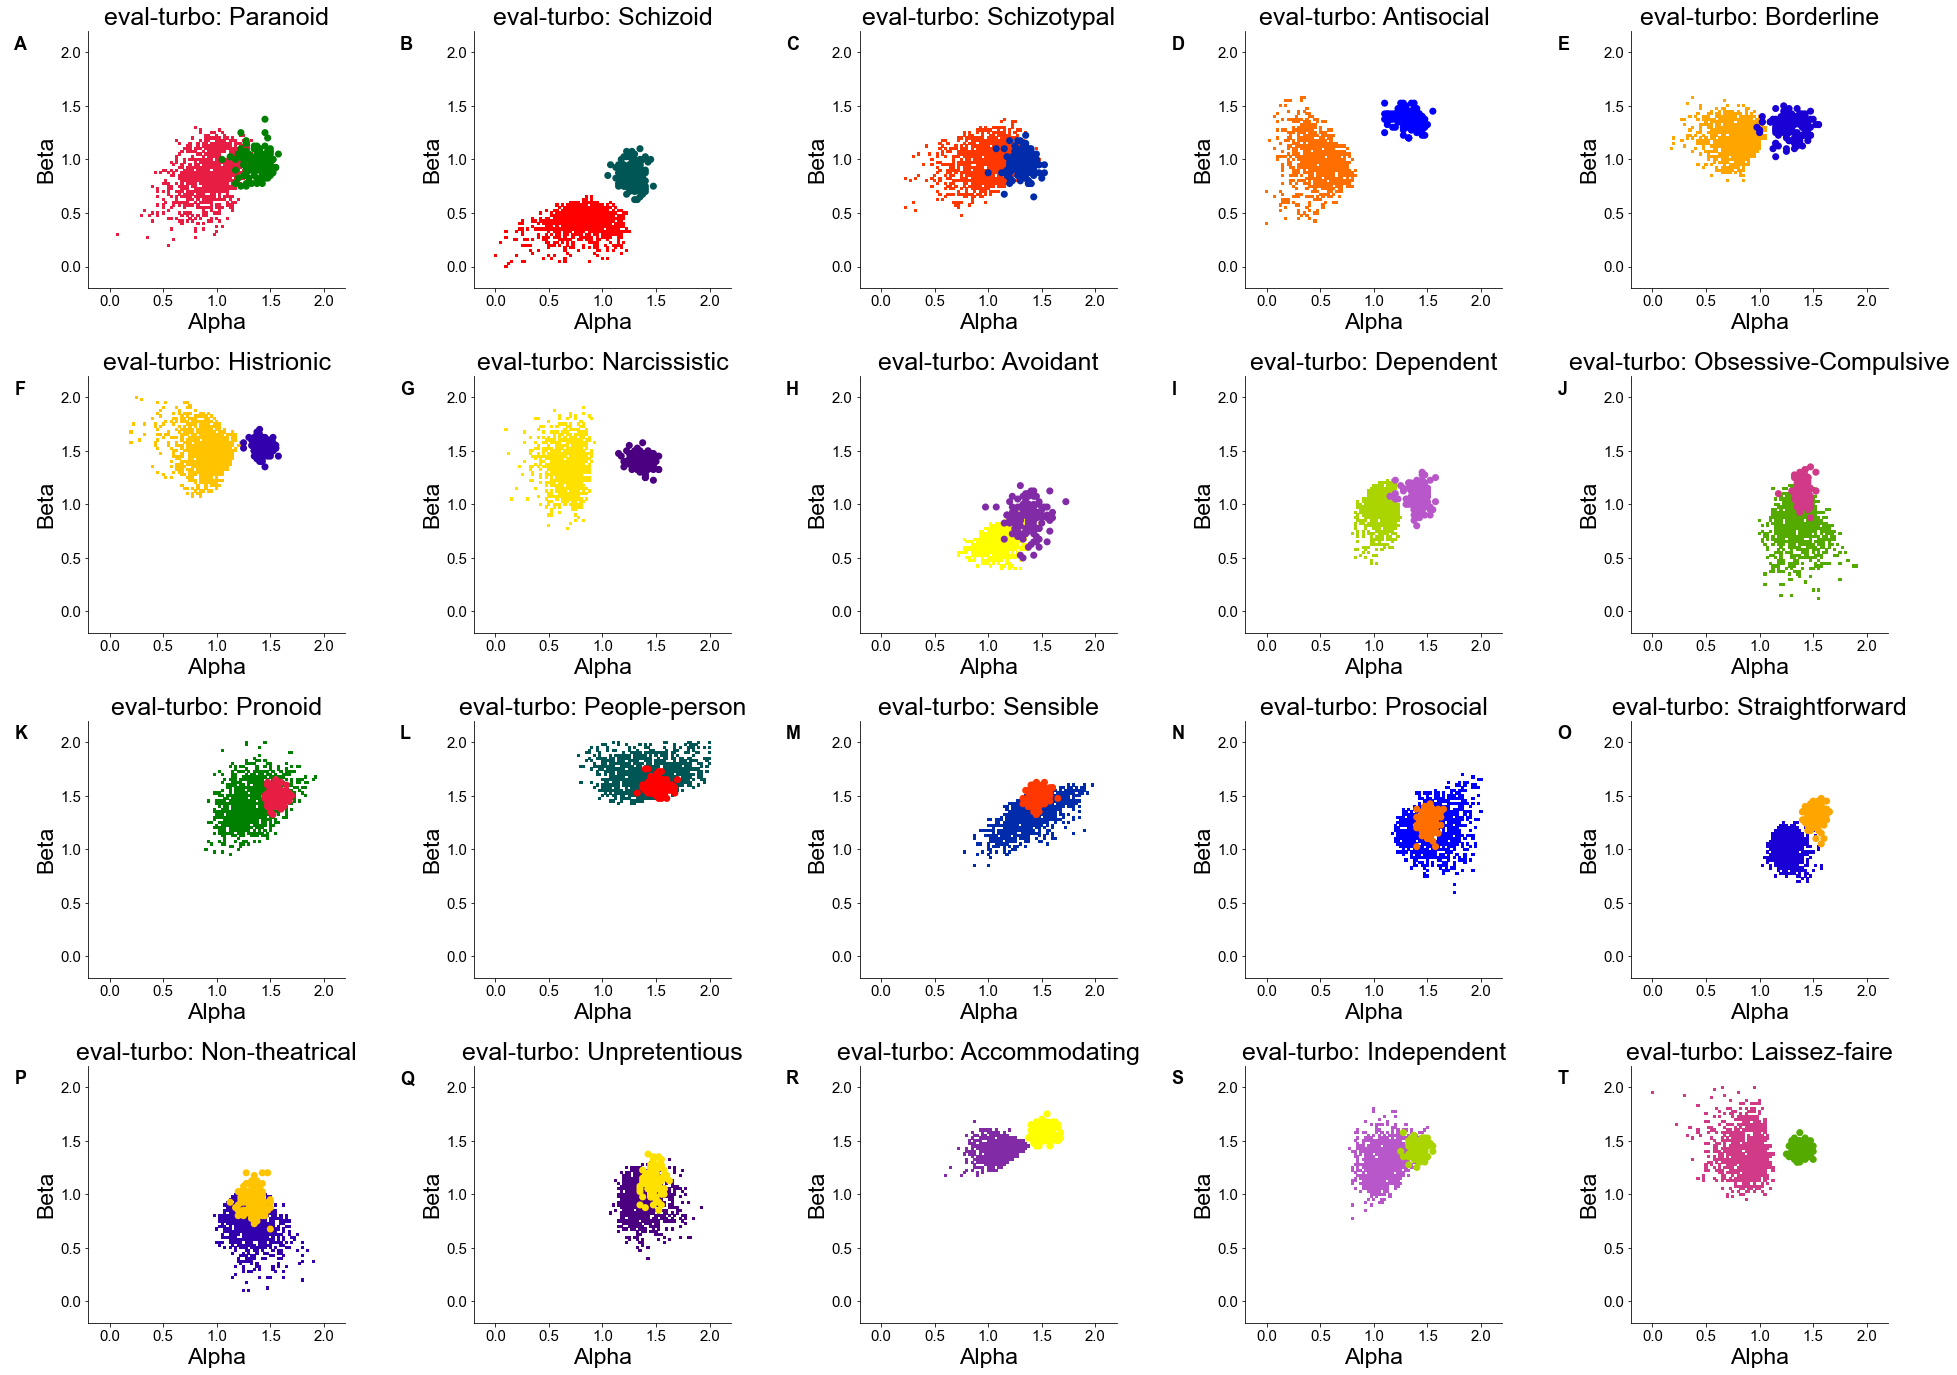

In [32]:
output_layout = (original_eval_imgs[0] * turbo_eval_imgs[0])

for idx in range(1, 20):
    output_layout += (original_eval_imgs[idx] * turbo_eval_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\eval_seperated_turbo.png", fmt="png")

output_layout

### t-sne

'''
turbo_tsne = tsne.fit_transform(np_turbo_response)

np_turbo_responses_tsne = np.concatenate((turbo_tsne, np.reshape(np_llm_label, (np_llm_label.shape[0], 1))), axis = 1)

df_turbo_responses_tsne = pd.DataFrame(np_turbo_responses_tsne, columns= ["X", "Y", "Label"])
'''

'''
img = hv.Scatter(
    data=df_turbo_responses_tsne, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=50, 
       alpha=1.0)

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))
'''

'''
turbo_tsne_imgs = [hv.Scatter(data=df_turbo_responses_tsne[df_turbo_responses_tsne.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=LABEL_NAMES[label_idx],
                              marker='o') for label_idx in range(0, 20)]

original_tsne_imgs =  [hv.Scatter(data=df_tsne[df_tsne.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=1, 
                                    alpha=1.0,
                                    title=LABEL_NAMES[label_idx],
                                    marker=',') for label_idx in range(0, 20)]
'''

'''
output_layout = (original_tsne_imgs[0] * turbo_tsne_imgs[0])

for idx in range(1, 20):
    output_layout += (original_tsne_imgs[idx] * turbo_tsne_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1))

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\personality\results\images\data_turbo_tsne.png", fmt="png")

output_layout
'''

### U-map

'''
turbo_responses_umap = u_map.transform(np_turbo_response)

np_turbo_responses_umap = np.concatenate((turbo_responses_umap, np.reshape(np_llm_label, (np_llm_label.shape[0], 1))), axis = 1)

df_turbo_responses_umap = pd.DataFrame(np_turbo_responses_umap, columns= ["X", "Y", "Label"])
'''


'''
img = hv.Scatter(
    data=df_turbo_responses_umap, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=50, 
       alpha=1.0)

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))
'''


'''

turbo_umap_imgs = [hv.Scatter(data=df_turbo_responses_umap[df_turbo_responses_umap.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=LABEL_NAMES[label_idx],
                              marker='o') for label_idx in range(0, 20)]

original_umap_imgs =  [hv.Scatter(data=df_umap[df_umap.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=5, 
                                    alpha=1.0,
                                    title=LABEL_NAMES[label_idx],
                                    marker=',') for label_idx in range(0, 20)]
'''


'''

output_layout = (original_umap_imgs[0] * turbo_umap_imgs[0])

for idx in range(1, 20):
    output_layout += (original_umap_imgs[idx] * turbo_umap_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\personality\results\images\data_umap_turbo", fmt="png")

output_layout
'''


### LDA

In [33]:
turbo_responses_lda = lda.transform(np_turbo_response[:, 0:40])

np_turbo_lda = np.concatenate((turbo_responses_lda, np.reshape(np_llm_label, (np_llm_label.shape[0], 1))), axis = 1)

df_turbo_lda = pd.DataFrame(np_turbo_lda, columns= ["X", "Y", "Label"])

:Scatter   [X]   (Y,Label)
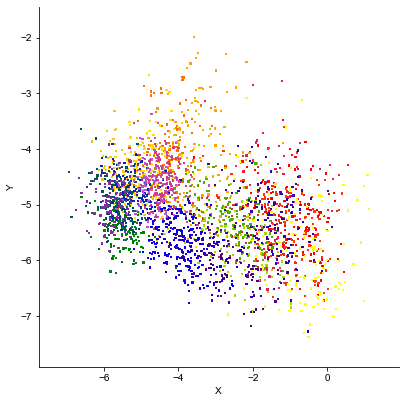

In [34]:
img = hv.Scatter(
    data=df_turbo_lda, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=5, 
       alpha=1.0,
       marker = ',')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))

In [35]:
turbo_lda_imgs = [hv.Scatter(data=df_turbo_lda[df_turbo_lda.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=f"resp-turbo: {LABEL_NAMES[label_idx]}",
                              marker='o',
                              fontsize={'title': 25, 
                  'labels': 18, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

original_lda_imgs =  [hv.Scatter(data=df_lda[df_lda.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=5, 
                                    alpha=1.0,
                                    #title=f"resp-turbo: {LABEL_NAMES[label_idx]}",
                                    marker=',',
                                    fontsize={'title': 25, 
                  'labels': 18, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

:Layout
   .Overlay.I     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.II    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.III   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IV    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.V     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VI    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VII   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VIII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IX    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.X     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XI    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XII   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIV   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XV    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVI   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVIII :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIX   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XX    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
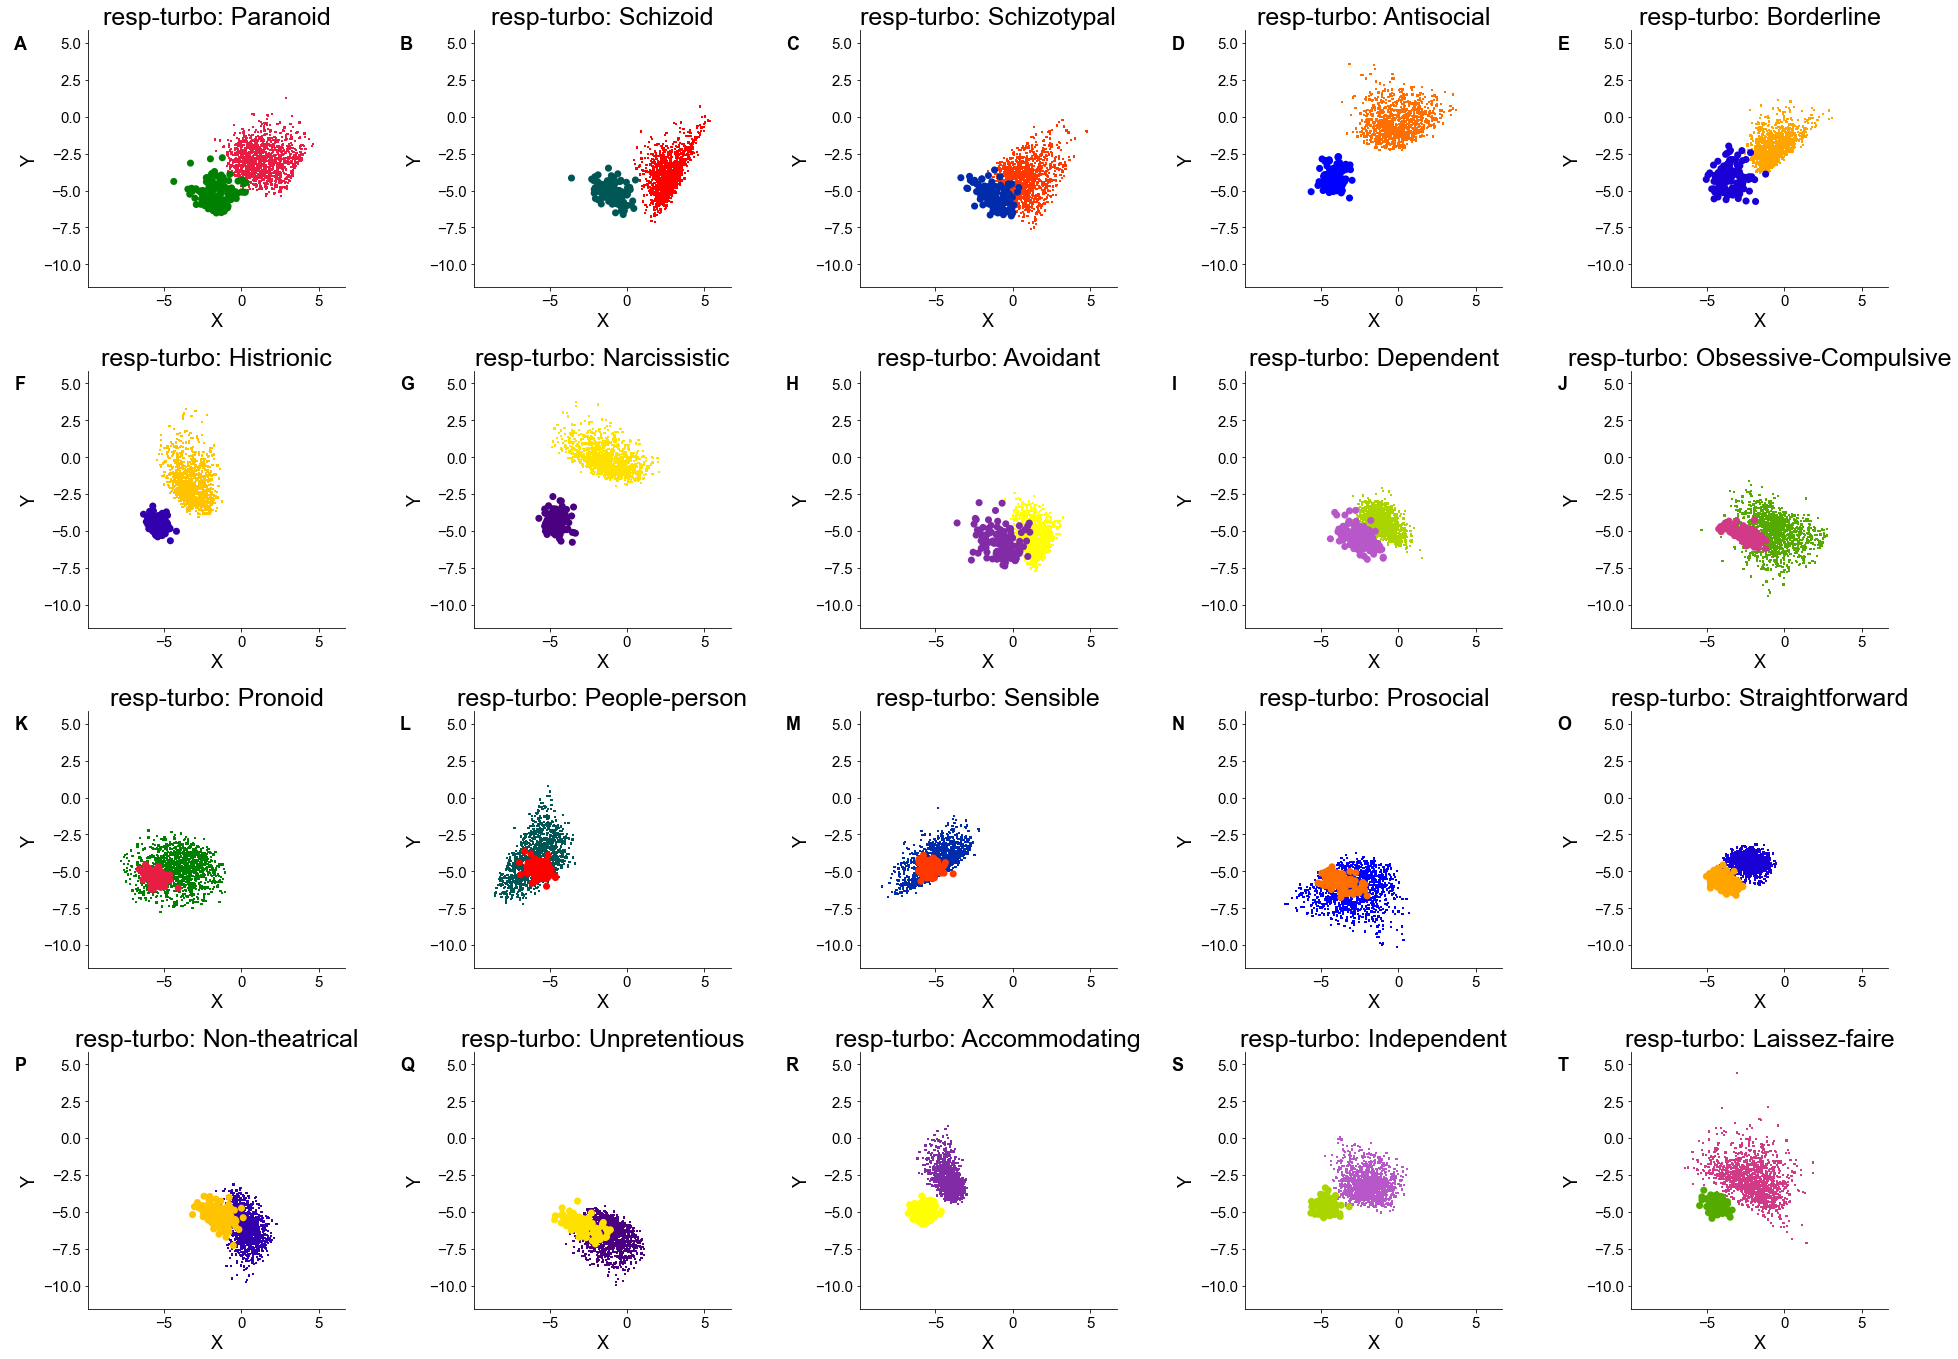

In [36]:

output_layout = (original_lda_imgs[0] * turbo_lda_imgs[0])

for idx in range(1, 20):
    output_layout += (original_lda_imgs[idx] * turbo_lda_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\responses_seperated_turbo.png", fmt="png")

output_layout

### Analysis

## IRR

In [37]:
irr_turbo = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_turbo_all_infromation[df_turbo_all_infromation.Label == label_idx]
    np_label_subset = df_label_subset.iloc[:, 0:40].to_numpy()

    irr = CalcInterRaterReliability(np_label_subset)
    irr_turbo[label_idx] = irr
    print(f"{LABEL_NAMES[label_idx]}: {irr}")

Paranoid: 0.4503414124015748
Schizoid: 0.467578125
Schizotypal: 0.4344826525590551
Antisocial: 0.49267039862204726
Borderline: 0.4622662401574803
Histrionic: 0.5674120324803149
Narcissistic: 0.5163016732283464
Avoidant: 0.412521530511811
Dependent: 0.4390625
Obsessive-Compulsive: 0.5521069143700787
Pronoid: 0.5502675935039371
People-person: 0.5825418307086614
Sensible: 0.56875
Prosocial: 0.5345318651574803
Straightforward: 0.5802319143700787
Non-theatrical: 0.4997416338582677
Unpretentious: 0.5047859251968504
Accommodating: 0.5523099163385827
Independent: 0.525144562007874
Laissez-faire: 0.5536786417322834


## Root Mean Squared Prediction Error (againstg Personality Facttors)

In [38]:
rmspe_facttors_turbo = np.zeros((20, 4))

for label_idx in range(0, 20):
    df_label_subset = df_turbo_all_infromation[df_turbo_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    rmspe = RootMeanSquaredError(np_array = np_ocean_subset, np_predictor = OCEAN_estimate)
    rmspe_facttors_turbo[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")

Paranoid: [0.19904459 0.14025902 0.11154641 0.4340288 ]
Schizoid: [0.1766424  0.15814476 0.26146448 0.22814298]
Schizotypal: [0.08425677 0.25173732 0.15212269 0.25437758]
Antisocial: [0.13039642 0.33375176 0.19181239 0.4062694 ]
Borderline: [0.09929977 0.31117967 0.16105305 0.32368333]
Histrionic: [0.08701392 0.32463877 0.07995301 0.29966411]
Narcissistic: [0.12552957 0.2317828  0.13100274 0.48774463]
Avoidant: [0.17433617 0.22041984 0.17629432 0.21774426]
Dependent: [0.16692878 0.21111519 0.12521082 0.115303  ]
Obsessive-Compulsive: [0.36450746 0.14238735 0.14389183 0.21714036]
Pronoid: [0.11411856 0.32189311 0.11160068 0.05547508]
People-person: [0.13244766 0.22386868 0.10128761 0.21082613]
Sensible: [0.26028677 0.13091699 0.03999394 0.17989294]
Prosocial: [0.2168239  0.05350599 0.13963191 0.08404184]
Straightforward: [0.28718307 0.09206812 0.1209161  0.12602471]
Non-theatrical: [0.22604604 0.07137938 0.14702753 0.11663722]
Unpretentious: [0.18746004 0.15068795 0.14242117 0.04160238]

## RMSE of Euclidean Distance (against Personality)

In [39]:
rmspe_distance_turbo = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_turbo_all_infromation[df_turbo_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    # Get the distance between the labeld point and the instance
    np_distance_subset = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]):
        np_distance_subset[idx] = np.linalg.norm(np_ocean_subset[idx] - OCEAN_estimate)

    # Calc the avgerage prediction distance
    np_avg_distance = np.mean(np_distance_subset)
    
    rmspe = RootMeanSquaredError(np_array = np_distance_subset, np_predictor = np_avg_distance)
    rmspe_distance_turbo[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")  


Paranoid: [0.07563693]
Schizoid: [0.0619949]
Schizotypal: [0.06138682]
Antisocial: [0.05637243]
Borderline: [0.07770418]
Histrionic: [0.04136025]
Narcissistic: [0.05207659]
Avoidant: [0.0753537]
Dependent: [0.05022742]
Obsessive-Compulsive: [0.04849131]
Pronoid: [0.04292352]
People-person: [0.04608715]
Sensible: [0.04466344]
Prosocial: [0.04423077]
Straightforward: [0.04360933]
Non-theatrical: [0.0620094]
Unpretentious: [0.05543527]
Accommodating: [0.04254034]
Independent: [0.03942942]
Laissez-faire: [0.04450892]


## RMSE Cosine Similarity (against Personality)

In [40]:
rmspe_cos_turbo = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_turbo_all_infromation[df_turbo_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])
    
    # Calculate the Cosine Similarity for each personality result
    np_cos_similarity = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]): 
        dot_product = np.dot(np_ocean_subset[idx], OCEAN_estimate)
        norm_instant = np.linalg.norm(np_ocean_subset[idx])
        norm_predict = np.linalg.norm(OCEAN_estimate)
        np_cos_similarity[idx] = dot_product/(norm_instant*norm_predict)

    # Calculate the Avg Cosine Similarity
    avg_cos_similarity = np.mean(np_cos_similarity)

    rmspe = RootMeanSquaredError(np_array = np_cos_similarity, np_predictor = avg_cos_similarity)
    rmspe_cos_turbo[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")   

Paranoid: [0.01658083]
Schizoid: [0.01579538]
Schizotypal: [0.00949641]
Antisocial: [0.01119706]
Borderline: [0.01309883]
Histrionic: [0.00677552]
Narcissistic: [0.01218648]
Avoidant: [0.01184688]
Dependent: [0.00530067]
Obsessive-Compulsive: [0.01265184]
Pronoid: [0.0048908]
People-person: [0.0059747]
Sensible: [0.00363406]
Prosocial: [0.00376134]
Straightforward: [0.00418578]
Non-theatrical: [0.00806188]
Unpretentious: [0.00517523]
Accommodating: [0.00436762]
Independent: [0.00507955]
Laissez-faire: [0.01214619]


--------------------

### Devinchi

In [41]:
np_devinchi_response = np.zeros((2560,50))

r_idx = 0
for label_idx in range(20):
    df = pd.read_csv(f'C:/Users/Jake Klinkert/Documents/School/HumIn Game Lab/APF/Papers/LLM/personality/notebooks/personality/results/original_128/model_text-davinci-003_128/post/{LABEL_NAMES[label_idx]}.csv')
    df_T = df.transpose(copy=True)

    factors_id = 0
    for index, row in df_T.iterrows():
        question_idx = 0
        for row_element in row:
            if factors_id < 5:
                factors_id += 1
                continue
            
            factors_id += 1
            factor_list = row_element.split(';')
            for response_idx in range(10):
                response = factor_list[response_idx][-1]
                np_devinchi_response[r_idx, question_idx] = int(response)
                question_idx += 1
        if factors_id > 5:
            r_idx += 1
                    
print(np_devinchi_response)

[[4. 5. 2. ... 5. 5. 5.]
 [2. 5. 4. ... 5. 4. 5.]
 [1. 5. 4. ... 4. 5. 5.]
 ...
 [4. 5. 4. ... 3. 3. 4.]
 [4. 3. 5. ... 5. 3. 5.]
 [4. 2. 5. ... 5. 4. 5.]]


In [42]:
np_devinchi_OCEA = EvaluateOceanTestResults(np_devinchi_response)
np_devinchi_OCEA

np_devinchi_CSCF = calc_CSCF(np_devinchi_OCEA)
np_devinchi_CSCF

np_llm_label = np.repeat(np.arange(20),128)

df_devinchi_all_infromation = CreateFullInfoDf(np_devinchi_response[:, 0:40], np_devinchi_OCEA, np_devinchi_CSCF, np_llm_label)
df_devinchi_all_infromation.describe()

E1           E2           E3           E4           E5  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000   
mean      3.189844     3.186719     4.326172     1.520703     4.396484   
std       1.232892     1.793866     0.598502     0.599890     0.888151   
min       1.000000     1.000000     2.000000     1.000000     1.000000   
25%       2.000000     1.000000     4.000000     1.000000     4.000000   
50%       4.000000     4.000000     4.000000     1.000000     5.000000   
75%       4.000000     5.000000     5.000000     2.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                E6           E7           E8           E9          E10  ...  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000  ...   
mean      1.759375     4.221484     1.543750     3.548828     2.722656  ...   
std       0.885332     0.700421     0.619187     1.052342     1.532644  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       1.000000     4.000000     1.000000     3.000000     2.000000  ...   
50%       2.000000     4.000000     2.000000     4.000000     2.000000  ...   
75%       2.000000     5.000000     2.000000     4.000000     5.000000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

                O8           O9          O10     Openness  Conscientiousness  \
count  2560.000000  2560.000000  2560.000000  2560.000000        2560.000000   
mean      1.032422     4.810937     4.742578     0.900039           0.897344   
std       0.189927     0.443129     0.483959     0.086385           0.087158   
min       1.000000     1.000000     1.000000     0.425000           0.300000   
25%       1.000000     5.000000     5.000000     0.900000           0.875000   
50%       1.000000     5.000000     5.000000     0.925000           0.925000   
75%       1.000000     5.000000     5.000000     0.950000           0.950000   
max       4.000000     5.000000     5.000000     1.000000           1.000000   

       Extraversion  Agreeableness        Alpha         Beta        Label  
count   2560.000000    2560.000000  2560.000000  2560.000000  2560.000000  
mean       0.723740       0.871611     1.768955     1.623779     9.500000  
std        0.153587       0.052367     0.103031     0.170805     5.767408  
min        0.175000       0.600000     1.200000     0.875000     0.000000  
25%        0.593750       0.850000     1.725000     1.475000     4.750000  
50%        0.750000       0.875000     1.800000     1.625000     9.500000  
75%        0.850000       0.900000     1.850000     1.775000    14.250000  
max        1.000000       1.000000     1.975000     2.000000    19.000000  

[8 rows x 47 columns]

In [43]:
compare_array = np_llm_label == GetPersonalityProfileLabels(np_devinchi_OCEA)
devinchi_accuracy = sum(compare_array)/compare_array.shape[0]
devinchi_accuracy

0.0890625

## Visualize

:Scatter   [Alpha]   (Beta,Label)
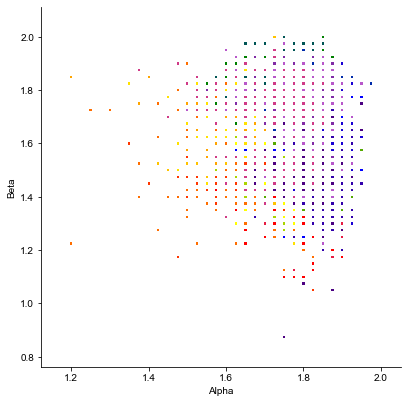

In [44]:
img =hv.Scatter(
    data=df_devinchi_all_infromation, kdims = ["Alpha"], vdims = ["Beta", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=5, 
       alpha=1.0,
       marker = ',')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))

:Layout
   .Overlay.I     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.II    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.III   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.V     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.X     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIV   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVI   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVIII :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIX   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
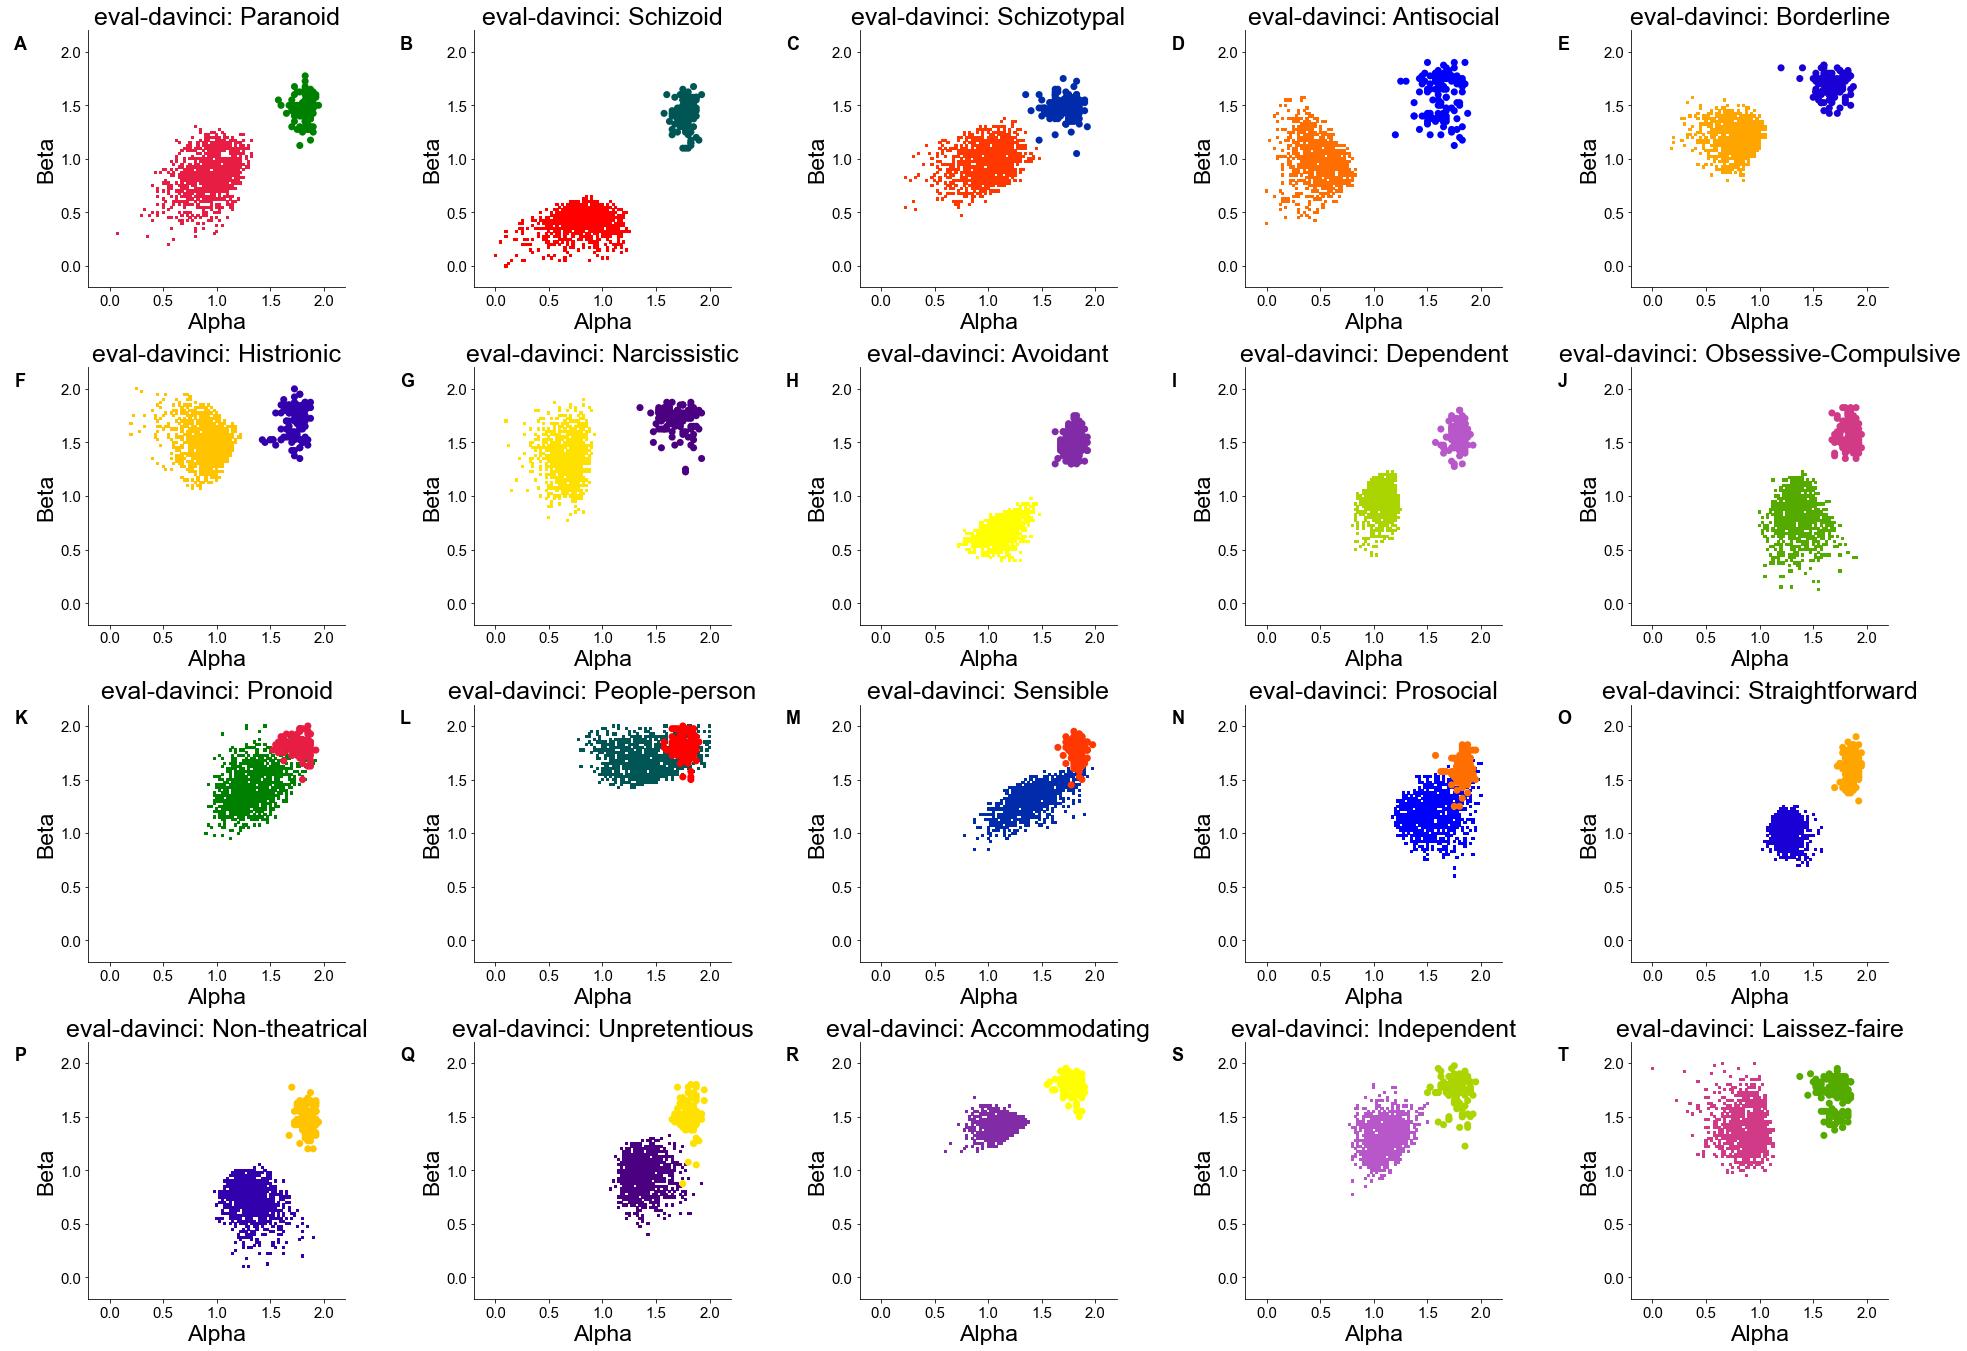

In [45]:
devinchi_eval_imgs = [hv.Scatter(data=df_devinchi_all_infromation[df_devinchi_all_infromation.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=f"eval-davinci: {LABEL_NAMES[label_idx]}",
                              marker='o',
                              fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

original_eval_imgs =  [hv.Scatter(data=df_all_infromation_subset[df_all_infromation_subset.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=10, 
                                    alpha=1.0,
                                    #title=f"eval-davinci: {LABEL_NAMES[label_idx]}",
                                    marker=',',
                                    fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

output_layout = (original_eval_imgs[0] * devinchi_eval_imgs[0])

for idx in range(1, 20):
    output_layout += (original_eval_imgs[idx] * devinchi_eval_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\eval_seperated_devinchi.png", fmt="png")

output_layout

### T-SNE

### u-map

'''
devinchi_responses_umap = u_map.transform(np_devinchi_response)

np_devinchi_responses_umap = np.concatenate((devinchi_responses_umap, np.reshape(np_llm_label, (np_llm_label.shape[0], 1))), axis = 1)

df_devinchi_responses_umap = pd.DataFrame(np_devinchi_responses_umap, columns= ["X", "Y", "Label"])
'''

'''
img = hv.Scatter(
    data=df_devinchi_responses_umap, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=50, 
       alpha=1.0)

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))
'''

'''
devinchi_umap_imgs = [hv.Scatter(data=df_devinchi_responses_umap[df_devinchi_responses_umap.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=LABEL_NAMES[label_idx],
                              marker='o') for label_idx in range(0, 20)]

original_umap_imgs =  [hv.Scatter(data=df_umap[df_umap.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=5, 
                                    alpha=1.0,
                                    title=LABEL_NAMES[label_idx],
                                    marker=',') for label_idx in range(0, 20)]
'''

'''
output_layout = (original_umap_imgs[0] * devinchi_umap_imgs[0])

for idx in range(1, 20):
    output_layout += (original_umap_imgs[idx] * devinchi_umap_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\personality\results\images\data_devinchi_umap.png", fmt="png")

output_layout
'''

### LDA

In [46]:
devinchi_responses_lda = lda.transform(np_devinchi_response[:,0:40])

np_devinchi_lda = np.concatenate((devinchi_responses_lda, np.reshape(np_llm_label, (np_llm_label.shape[0], 1))), axis = 1)

df_devinchi_lda = pd.DataFrame(np_devinchi_lda, columns= ["X", "Y", "Label"])

:Scatter   [X]   (Y,Label)
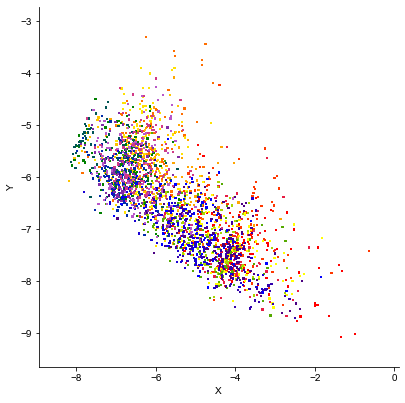

In [47]:
img = hv.Scatter(
    data=df_devinchi_lda, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=5, 
       alpha=1.0,
       marker = ',')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))

In [48]:
devinchi_lda_imgs = [hv.Scatter(data=df_devinchi_lda[df_devinchi_lda.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=f"resp-davinci: {LABEL_NAMES[label_idx]}",
                              marker='o',
                              fontsize={'title': 25, 
                  'labels': 18, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

original_lda_imgs =  [hv.Scatter(data=df_lda[df_lda.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=5, 
                                    alpha=1.0,
                                    #title=f"respo-davinci: {LABEL_NAMES[label_idx]}",
                                    marker=',',
                                    fontsize={'title': 25, 
                  'labels': 18, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

:Layout
   .Overlay.I     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.II    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.III   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IV    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.V     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VI    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VII   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VIII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IX    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.X     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XI    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XII   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIV   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XV    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVI   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVIII :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIX   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XX    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
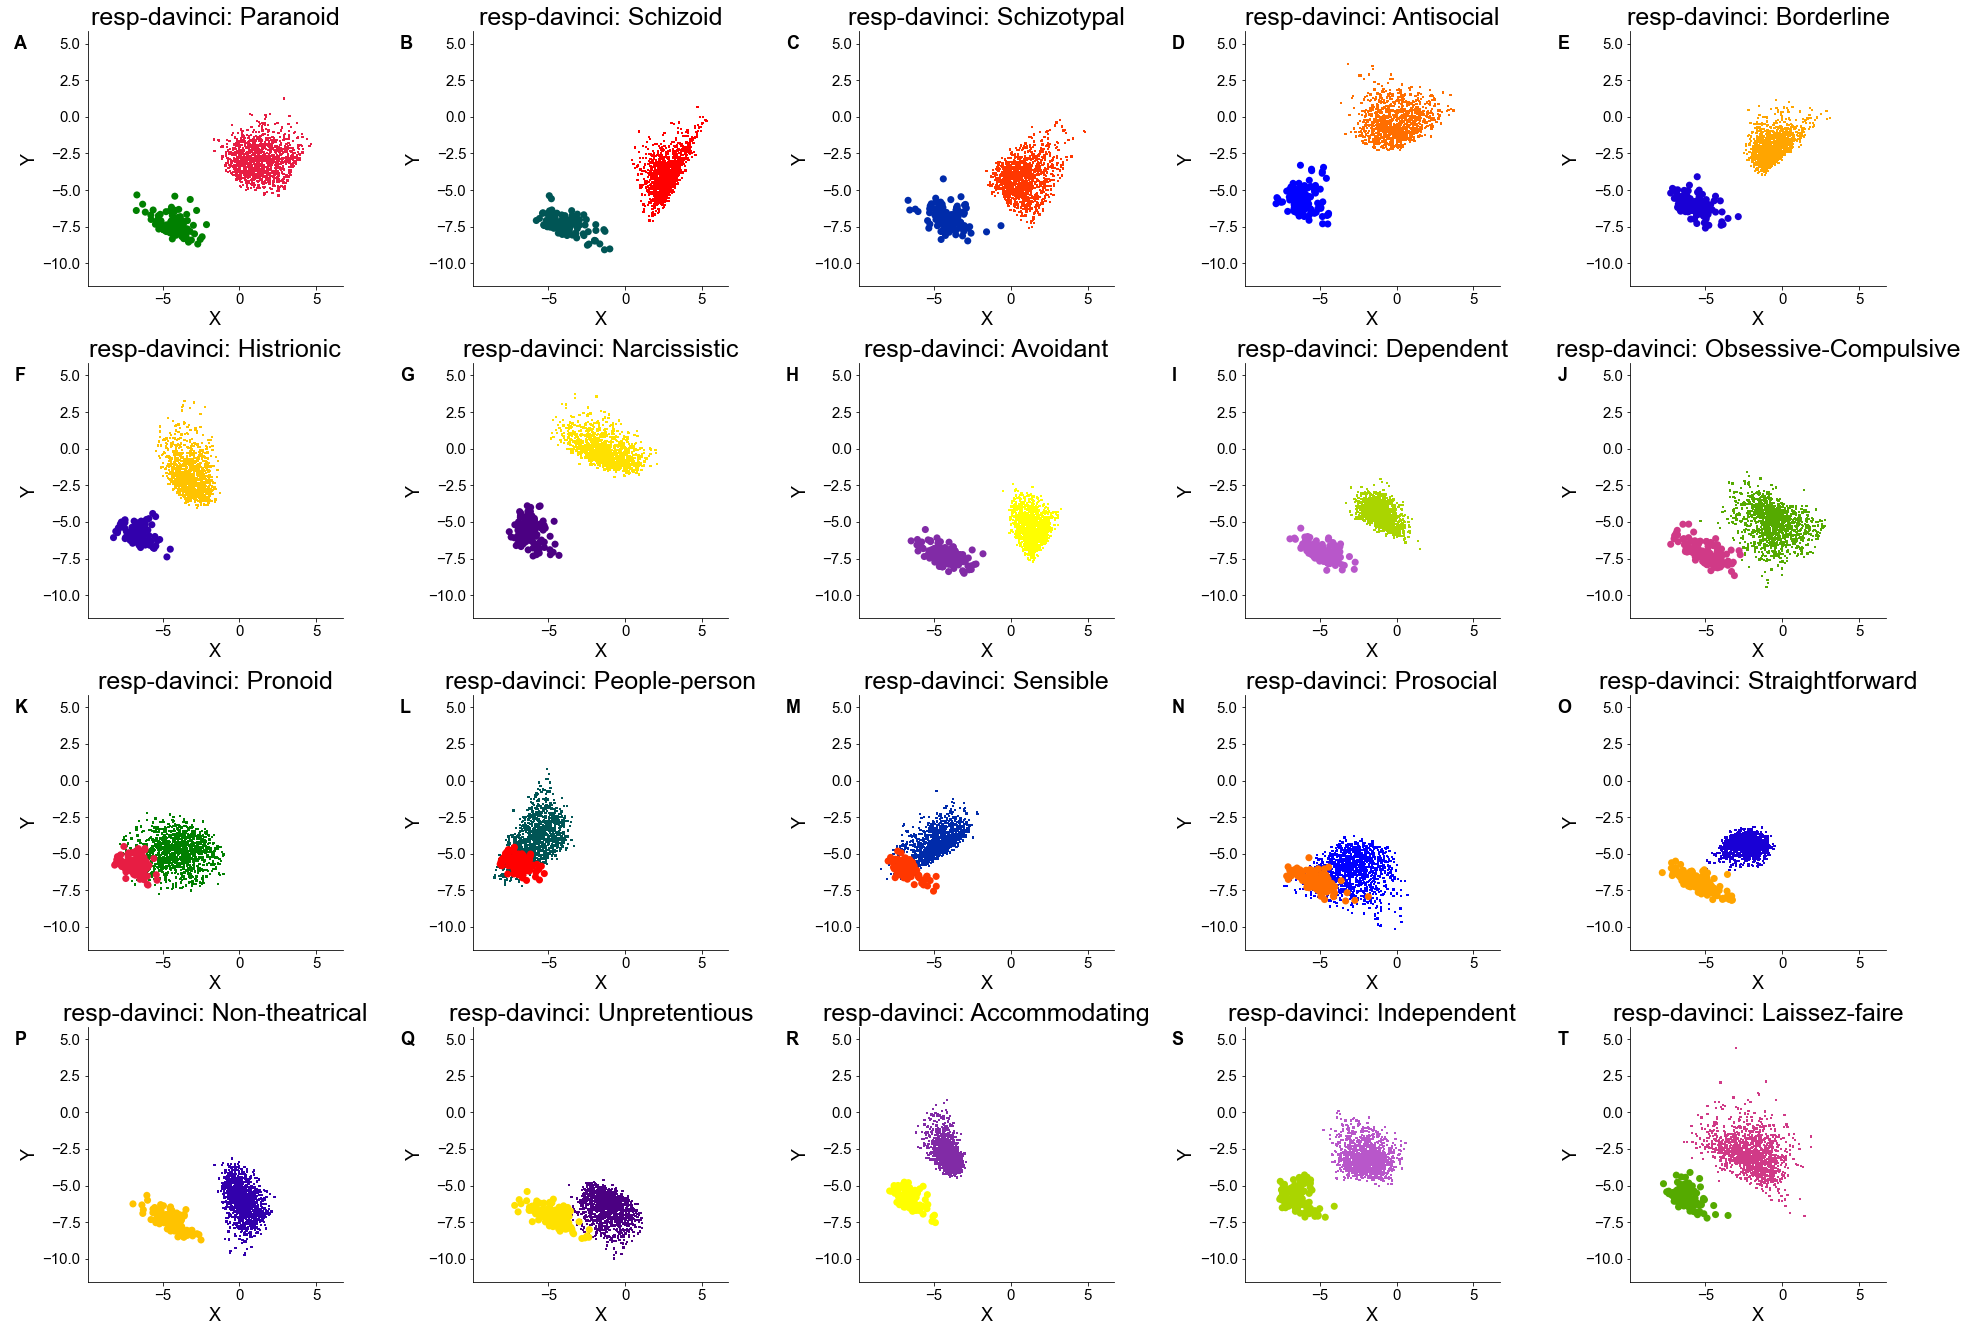

In [49]:
output_layout = (original_lda_imgs[0] * devinchi_lda_imgs[0])

for idx in range(1, 20):
    output_layout += (original_lda_imgs[idx] * devinchi_lda_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\responses_seperated_devinchi.png", fmt="png")

output_layout

## Analytics

### IRR

In [50]:
irr_devinchi = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_devinchi_all_infromation[df_devinchi_all_infromation.Label == label_idx]
    np_label_subset = df_label_subset.iloc[:, 0:40].to_numpy()

    irr = CalcInterRaterReliability(np_label_subset)
    irr_devinchi[label_idx] = irr
    print(f"{LABEL_NAMES[label_idx]}: {irr}")

Paranoid: 0.6291154035433071
Schizoid: 0.5421782726377953
Schizotypal: 0.6062623031496063
Antisocial: 0.6041922982283464
Borderline: 0.6330708661417322
Histrionic: 0.5283741387795275
Narcissistic: 0.49378075787401576
Avoidant: 0.6623954232283464
Dependent: 0.6390932578740157
Obsessive-Compulsive: 0.5727085383858268
Pronoid: 0.5707892470472441
People-person: 0.5279865895669291
Sensible: 0.6253137303149606
Prosocial: 0.5974809301181102
Straightforward: 0.6318743848425197
Non-theatrical: 0.584621062992126
Unpretentious: 0.5772053395669291
Accommodating: 0.5804133858267716
Independent: 0.5546690452755906
Laissez-faire: 0.5122631643700788


### Root Mean Squared Prediction Error (againstg Personality Facttors)

In [51]:
rmspe_facttors_devinchi = np.zeros((20, 4))

for label_idx in range(0, 20):
    df_label_subset = df_devinchi_all_infromation[df_devinchi_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    rmspe = RootMeanSquaredError(np_array = np_ocean_subset, np_predictor = OCEAN_estimate)
    rmspe_facttors_devinchi[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")

Paranoid: [0.52036045 0.34447471 0.25575796 0.66532031]
Schizoid: [0.53763934 0.42809078 0.45106147 0.44385166]
Schizotypal: [0.36275851 0.4290007  0.35640718 0.45152621]
Antisocial: [0.28127657 0.44883595 0.31173343 0.59419337]
Borderline: [0.33925368 0.43006742 0.28212814 0.5587334 ]
Histrionic: [0.22646126 0.4887499  0.12867073 0.43514584]
Narcissistic: [0.34536362 0.40772667 0.21316211 0.62220178]
Avoidant: [0.50424404 0.43711562 0.42692533 0.39625156]
Dependent: [0.47569643 0.45364549 0.26572428 0.24138811]
Obsessive-Compulsive: [0.65727871 0.12151363 0.30891534 0.3982755 ]
Pronoid: [0.32070114 0.49132428 0.20785461 0.09543048]
People-person: [0.28902348 0.38382837 0.07592785 0.29814596]
Sensible: [0.46997588 0.3635862  0.10916723 0.29913375]
Prosocial: [0.46077328 0.28374174 0.22306021 0.1563779 ]
Straightforward: [0.50353797 0.30798484 0.2197735  0.23291923]
Non-theatrical: [0.54924872 0.33872073 0.33420952 0.32761202]
Unpretentious: [0.4662289  0.38606845 0.24574425 0.10940935]

### RMSE of Euclidean Distance (against Personality)


In [52]:
rmspe_distance_devinchi = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_devinchi_all_infromation[df_devinchi_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    # Get the distance between the labeld point and the instance
    np_distance_subset = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]):
        np_distance_subset[idx] = np.linalg.norm(np_ocean_subset[idx] - OCEAN_estimate)

    # Calc the avgerage prediction distance
    np_avg_distance = np.mean(np_distance_subset)
    
    rmspe = RootMeanSquaredError(np_array = np_distance_subset, np_predictor = np_avg_distance)
    rmspe_distance_devinchi[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")  


Paranoid: [0.05651246]
Schizoid: [0.06295034]
Schizotypal: [0.07188906]
Antisocial: [0.08454761]
Borderline: [0.05742615]
Histrionic: [0.07092089]
Narcissistic: [0.06754427]
Avoidant: [0.05929015]
Dependent: [0.05110443]
Obsessive-Compulsive: [0.04791913]
Pronoid: [0.05664536]
People-person: [0.04414985]
Sensible: [0.04212837]
Prosocial: [0.05142794]
Straightforward: [0.05131097]
Non-theatrical: [0.05468788]
Unpretentious: [0.05772396]
Accommodating: [0.04415504]
Independent: [0.06613234]
Laissez-faire: [0.07283896]


### RMSE Cosine Similarity (against Personality)

In [53]:
rmspe_cos_devinchi = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_devinchi_all_infromation[df_devinchi_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])
    
    # Calculate the Cosine Similarity for each personality result
    np_cos_similarity = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]): 
        dot_product = np.dot(np_ocean_subset[idx], OCEAN_estimate)
        norm_instant = np.linalg.norm(np_ocean_subset[idx])
        norm_predict = np.linalg.norm(OCEAN_estimate)
        np_cos_similarity[idx] = dot_product/(norm_instant*norm_predict)

    # Calculate the Avg Cosine Similarity
    avg_cos_similarity = np.mean(np_cos_similarity)

    rmspe = RootMeanSquaredError(np_array = np_cos_similarity, np_predictor = avg_cos_similarity)
    rmspe_cos_devinchi[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")   

Paranoid: [0.01125702]
Schizoid: [0.01167488]
Schizotypal: [0.00781104]
Antisocial: [0.02584781]
Borderline: [0.0089055]
Histrionic: [0.01207157]
Narcissistic: [0.01607463]
Avoidant: [0.00881903]
Dependent: [0.00465069]
Obsessive-Compulsive: [0.00593955]
Pronoid: [0.00736206]
People-person: [0.00821673]
Sensible: [0.00802636]
Prosocial: [0.00533414]
Straightforward: [0.00611925]
Non-theatrical: [0.00682729]
Unpretentious: [0.00668174]
Accommodating: [0.00918248]
Independent: [0.00927473]
Laissez-faire: [0.02320601]


--------------------

## GPT-4

In [54]:
np_gpt4_response = np.zeros((2560,50), dtype=int)

r_idx = 0
for label_idx in range(20):
    df = pd.read_csv(f'C:/Users/Jake Klinkert/Documents/School/HumIn Game Lab/APF/Papers/LLM/personality/notebooks/personality/results/original_128/model_gpt-4_128/post/{LABEL_NAMES[label_idx]}.csv')
    df_T = df.transpose(copy=True)

    factors_id = 0
    for index, row in df_T.iterrows():
        question_idx = 0
        print(f"{label_idx}, {index}")
        for row_element in row:
            if factors_id < 5:
                factors_id += 1
                continue
            
            factors_id += 1
            factor_list = row_element.split(';')
            for response_idx in range(10):
                response = factor_list[response_idx][-1]
                np_gpt4_response[r_idx, question_idx] = int(response)
                question_idx += 1
        if factors_id > 5:
            r_idx += 1
                    
print(np_gpt4_response)

0, Factor
0, 0
0, 1
0, 2
0, 3
0, 4
0, 5
0, 6
0, 7
0, 8
0, 9
0, 10
0, 11
0, 12
0, 13
0, 14
0, 15
0, 16
0, 17
0, 18
0, 19
0, 20
0, 21
0, 22
0, 23
0, 24
0, 25
0, 26
0, 27
0, 28
0, 29
0, 30
0, 31
0, 32
0, 33
0, 34
0, 35
0, 36
0, 37
0, 38
0, 39
0, 40
0, 41
0, 42
0, 43
0, 44
0, 45
0, 46
0, 47
0, 48
0, 49
0, 50
0, 51
0, 52
0, 53
0, 54
0, 55
0, 56
0, 57
0, 58
0, 59
0, 60
0, 61
0, 62
0, 63
0, 64
0, 65
0, 66
0, 67
0, 68
0, 69
0, 70
0, 71
0, 72
0, 73
0, 74
0, 75
0, 76
0, 77
0, 78
0, 79
0, 80
0, 81
0, 82
0, 83
0, 84
0, 85
0, 86
0, 87
0, 88
0, 89
0, 90
0, 91
0, 92
0, 93
0, 94
0, 95
0, 96
0, 97
0, 98
0, 99
0, 100
0, 101
0, 102
0, 103
0, 104
0, 105
0, 106
0, 107
0, 108
0, 109
0, 110
0, 111
0, 112
0, 113
0, 114
0, 115
0, 116
0, 117
0, 118
0, 119
0, 120
0, 121
0, 122
0, 123
0, 124
0, 125
0, 126
0, 127
1, Factor
1, 0
1, 1
1, 2
1, 3
1, 4
1, 5
1, 6
1, 7
1, 8
1, 9
1, 10
1, 11
1, 12
1, 13
1, 14
1, 15
1, 16
1, 17
1, 18
1, 19
1, 20
1, 21
1, 22
1, 23
1, 24
1, 25
1, 26
1, 27
1, 28
1, 29
1, 30
1, 31
1, 32
1, 33


In [55]:
np_gpt4_OCEA = EvaluateOceanTestResults(np_gpt4_response)
np_gpt4_OCEA


array([[0.375, 0.725, 0.225, 0.225],
       [0.425, 0.7  , 0.225, 0.2  ],
       [0.425, 0.425, 0.2  , 0.225],
       ...,
       [0.725, 0.25 , 0.7  , 0.7  ],
       [0.725, 0.3  , 0.825, 0.675],
       [0.7  , 0.225, 0.725, 0.7  ]])

In [56]:
np_gpt4_CSCF = calc_CSCF(np_gpt4_OCEA)
np_gpt4_CSCF


array([[0.95 , 0.6  ],
       [0.9  , 0.65 ],
       [0.65 , 0.625],
       ...,
       [0.95 , 1.425],
       [0.975, 1.55 ],
       [0.925, 1.425]])

In [57]:
np_llm_label = np.repeat(np.arange(20),128)

In [58]:

df_gpt4_all_infromation = CreateFullInfoDf(np_gpt4_response[:,0:40], np_gpt4_OCEA, np_gpt4_CSCF, np_llm_label)
df_gpt4_all_infromation.describe()


E1           E2           E3           E4           E5  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000   
mean      3.126953     3.010547     3.578906     3.130469     3.172266   
std       1.093113     1.015841     1.038166     1.074851     1.214255   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     3.000000     2.000000     2.000000   
50%       3.000000     3.000000     4.000000     3.000000     3.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                E6           E7           E8           E9          E10  ...  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000  ...   
mean      3.017969     3.153125     3.300391     2.868750     3.401172  ...   
std       0.961789     1.289325     1.094946     1.076572     1.131971  ...   
min       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
25%       2.000000     2.000000     2.000000     2.000000     2.000000  ...   
50%       3.000000     3.000000     3.000000     3.000000     3.000000  ...   
75%       4.000000     4.000000     4.000000     4.000000     4.000000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

                O8           O9          O10     Openness  Conscientiousness  \
count  2560.000000  2560.000000  2560.000000  2560.000000        2560.000000   
mean      2.746484     3.180859     3.317578     0.586133           0.531787   
std       1.064998     0.879016     0.674092     0.136336           0.181626   
min       1.000000     2.000000     2.000000     0.225000           0.200000   
25%       2.000000     2.000000     3.000000     0.450000           0.350000   
50%       2.000000     3.000000     3.000000     0.650000           0.525000   
75%       4.000000     4.000000     4.000000     0.700000           0.700000   
max       5.000000     5.000000     5.000000     0.900000           1.000000   

       Extraversion  Agreeableness        Alpha         Beta        Label  
count   2560.000000    2560.000000  2560.000000  2560.000000  2560.000000  
mean       0.500986       0.554336     1.086123     1.087119     9.500000  
std        0.255228       0.213235     0.312885     0.377704     5.767408  
min        0.000000       0.075000     0.475000     0.325000     0.000000  
25%        0.250000       0.350000     0.775000     0.700000     4.750000  
50%        0.525000       0.625000     1.100000     1.175000     9.500000  
75%        0.725000       0.750000     1.375000     1.450000    14.250000  
max        0.975000       0.900000     1.675000     1.700000    19.000000  

[8 rows x 47 columns]

In [59]:
compare_array = np_llm_label == GetPersonalityProfileLabels(np_gpt4_OCEA)
gpt4_accuracy = sum(compare_array)/compare_array.shape[0]
gpt4_accuracy

0.625

### Visualize Synthetic data

:Scatter   [Alpha]   (Beta,Label)
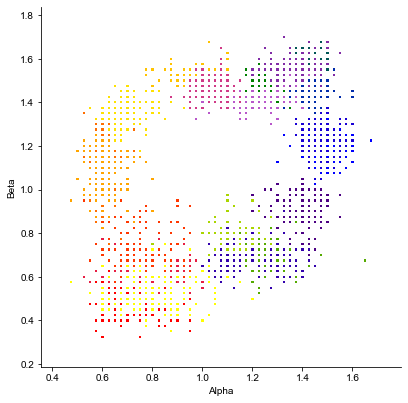

In [60]:
img =hv.Scatter(
    data=df_gpt4_all_infromation, kdims = ["Alpha"], vdims = ["Beta", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=5, 
       alpha=1.0,
       marker = ',')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))


:Layout
   .Overlay.I     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.II    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.III   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.V     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.X     :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XI    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XII   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIV   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XV    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVI   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XVIII :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XIX   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.XX    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
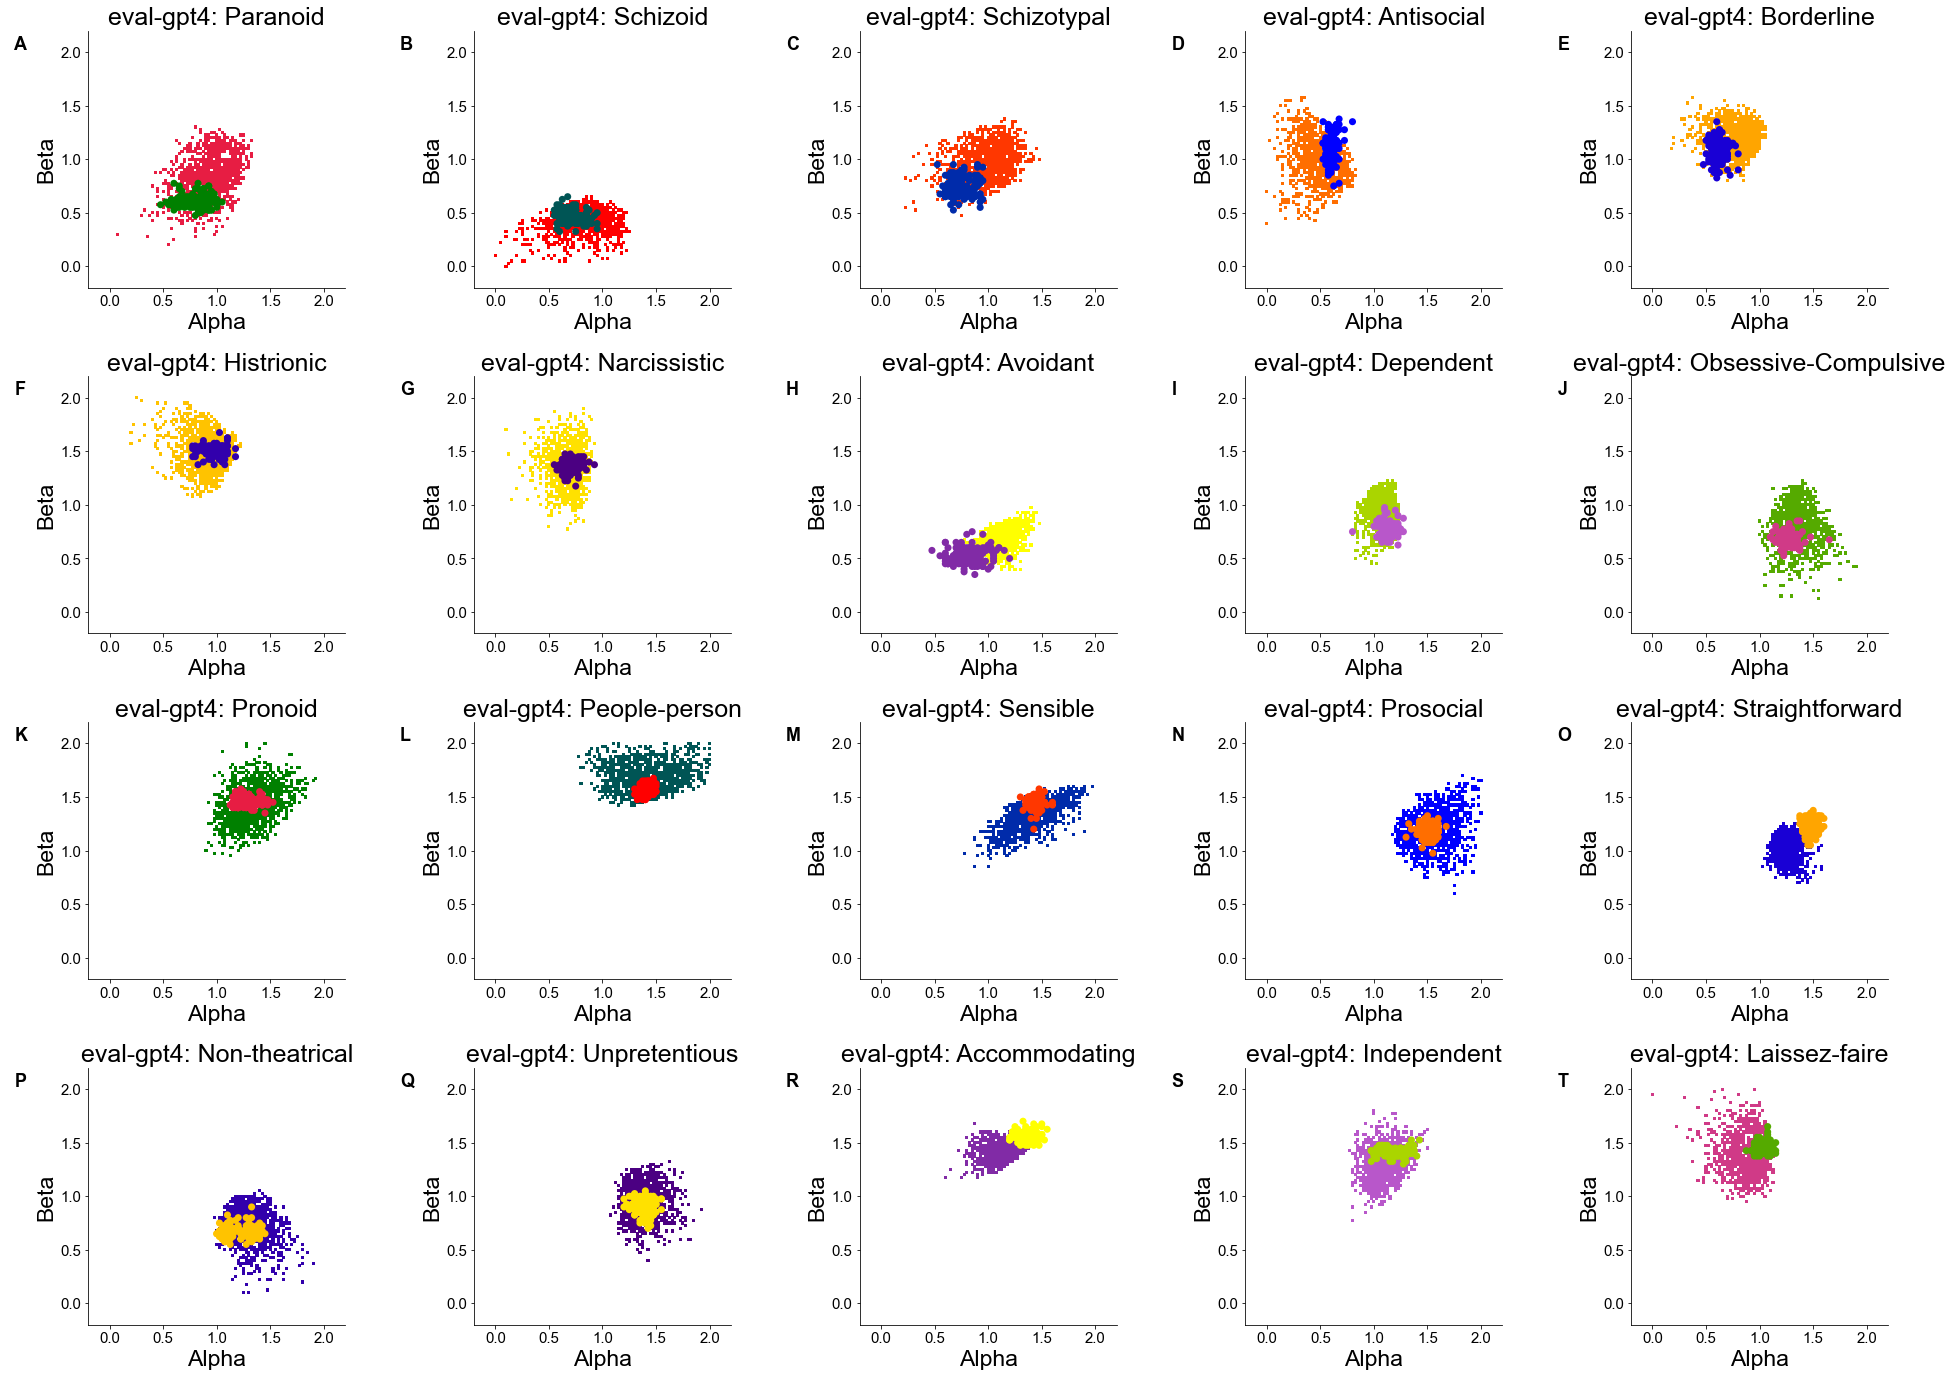

In [61]:
gpt4_eval_imgs = [hv.Scatter(data=df_gpt4_all_infromation[df_gpt4_all_infromation.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=f"eval-gpt4: {LABEL_NAMES[label_idx]}",
                              marker='o',
                              fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

original_eval_imgs =  [hv.Scatter(data=df_all_infromation_subset[df_all_infromation_subset.Label == label_idx], kdims = ["Alpha"], vdims = ["Beta", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=10, 
                                    alpha=1.0,
                                    #title=f"eval-gpt4: {LABEL_NAMES[label_idx]}",
                                    marker=',',
                                    fontsize={'title': 25, 
                  'labels': 23, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

output_layout = (original_eval_imgs[0] * gpt4_eval_imgs[0])

for idx in range(1, 20):
    output_layout += (original_eval_imgs[idx] * gpt4_eval_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\eval_seperated_gpt4.png", fmt="png")

output_layout

### t-sne


### u-map

'''
gpt4_responses_umap = u_map.transform(np_gpt4_response)

np_gpt4_responses_umap = np.concatenate((gpt4_responses_umap, np.reshape(np_llm_label, (np_llm_label.shape[0], 1))), axis = 1)

df_gpt4_responses_umap = pd.DataFrame(np_gpt4_responses_umap, columns= ["X", "Y", "Label"])
'''

'''
img = hv.Scatter(
    data=df_gpt4_responses_umap, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=50, 
       alpha=1.0)

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))
'''

'''
gpt4_umap_imgs = [hv.Scatter(data=df_gpt4_responses_umap[df_gpt4_responses_umap.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=LABEL_NAMES[label_idx],
                              marker='o') for label_idx in range(0, 20)]

original_umap_imgs =  [hv.Scatter(data=df_umap[df_umap.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=5, 
                                    alpha=1.0,
                                    title=LABEL_NAMES[label_idx],
                                    marker=',') for label_idx in range(0, 20)]
'''

'''
output_layout = (original_umap_imgs[0] * gpt4_umap_imgs[0])

for idx in range(1, 20):
    output_layout += (original_umap_imgs[idx] * gpt4_umap_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\personality\results\images\data_gpt4_umap.png", fmt="png")

output_layout
'''


### LDA


In [62]:
gpt4_responses_lda = lda.transform(np_gpt4_response[:,0:40])

np_gpt4_lda = np.concatenate((gpt4_responses_lda, np.reshape(np_llm_label, (np_llm_label.shape[0], 1))), axis = 1)

df_gpt4_lda = pd.DataFrame(np_gpt4_lda, columns= ["X", "Y", "Label"])

:Scatter   [X]   (Y,Label)
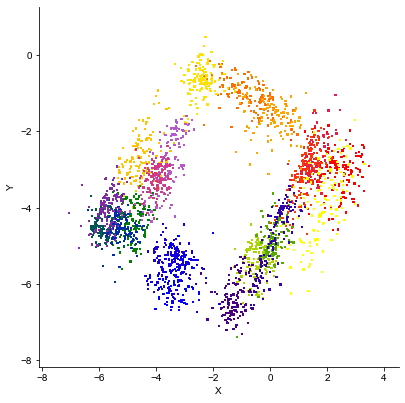

In [63]:
img = hv.Scatter(
    data=df_gpt4_lda, kdims = ["X"], vdims = ["Y", "Label"]
).opts(color='Label', 
       cmap=LABEL_COLORS_HEX, 
       s=5, 
       alpha=1.0,
       marker = ',')

img.opts(aspect=1, fig_inches=5, fig_bounds=(0, 0, 1, 1))



In [64]:
gpt4_lda_imgs = [hv.Scatter(data=df_gpt4_lda[df_gpt4_lda.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                       ).opts(color='Label',
                              cmap=[LABEL_COLORS_HEX[(label_idx + 10) % 20]],
                              s=50,
                              alpha=1.0,
                              title=f"resp-gpt4: {LABEL_NAMES[label_idx]}",
                              marker='o',
                              fontsize={'title': 25, 
                  'labels': 18, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

original_lda_imgs =  [hv.Scatter(data=df_lda[df_lda.Label == label_idx], kdims = ["X"], vdims = ["Y", "Label"]
                             ).opts(color='Label', 
                                    cmap=[LABEL_COLORS_HEX[label_idx]], 
                                    s=5, 
                                    alpha=1.0,
                                    #title=f"resp-gpt4: {LABEL_NAMES[label_idx]}",
                                    marker=',',
                                    fontsize={'title': 25, 
                  'labels': 18, 
                  'xticks': 15, 
                  'yticks': 15}) for label_idx in range(0, 20)]

:Layout
   .Overlay.I     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.II    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.III   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IV    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.V     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VI    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VII   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VIII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IX    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.X     :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XI    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XII   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIV   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XV    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVI   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XVIII :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XIX   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.XX    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
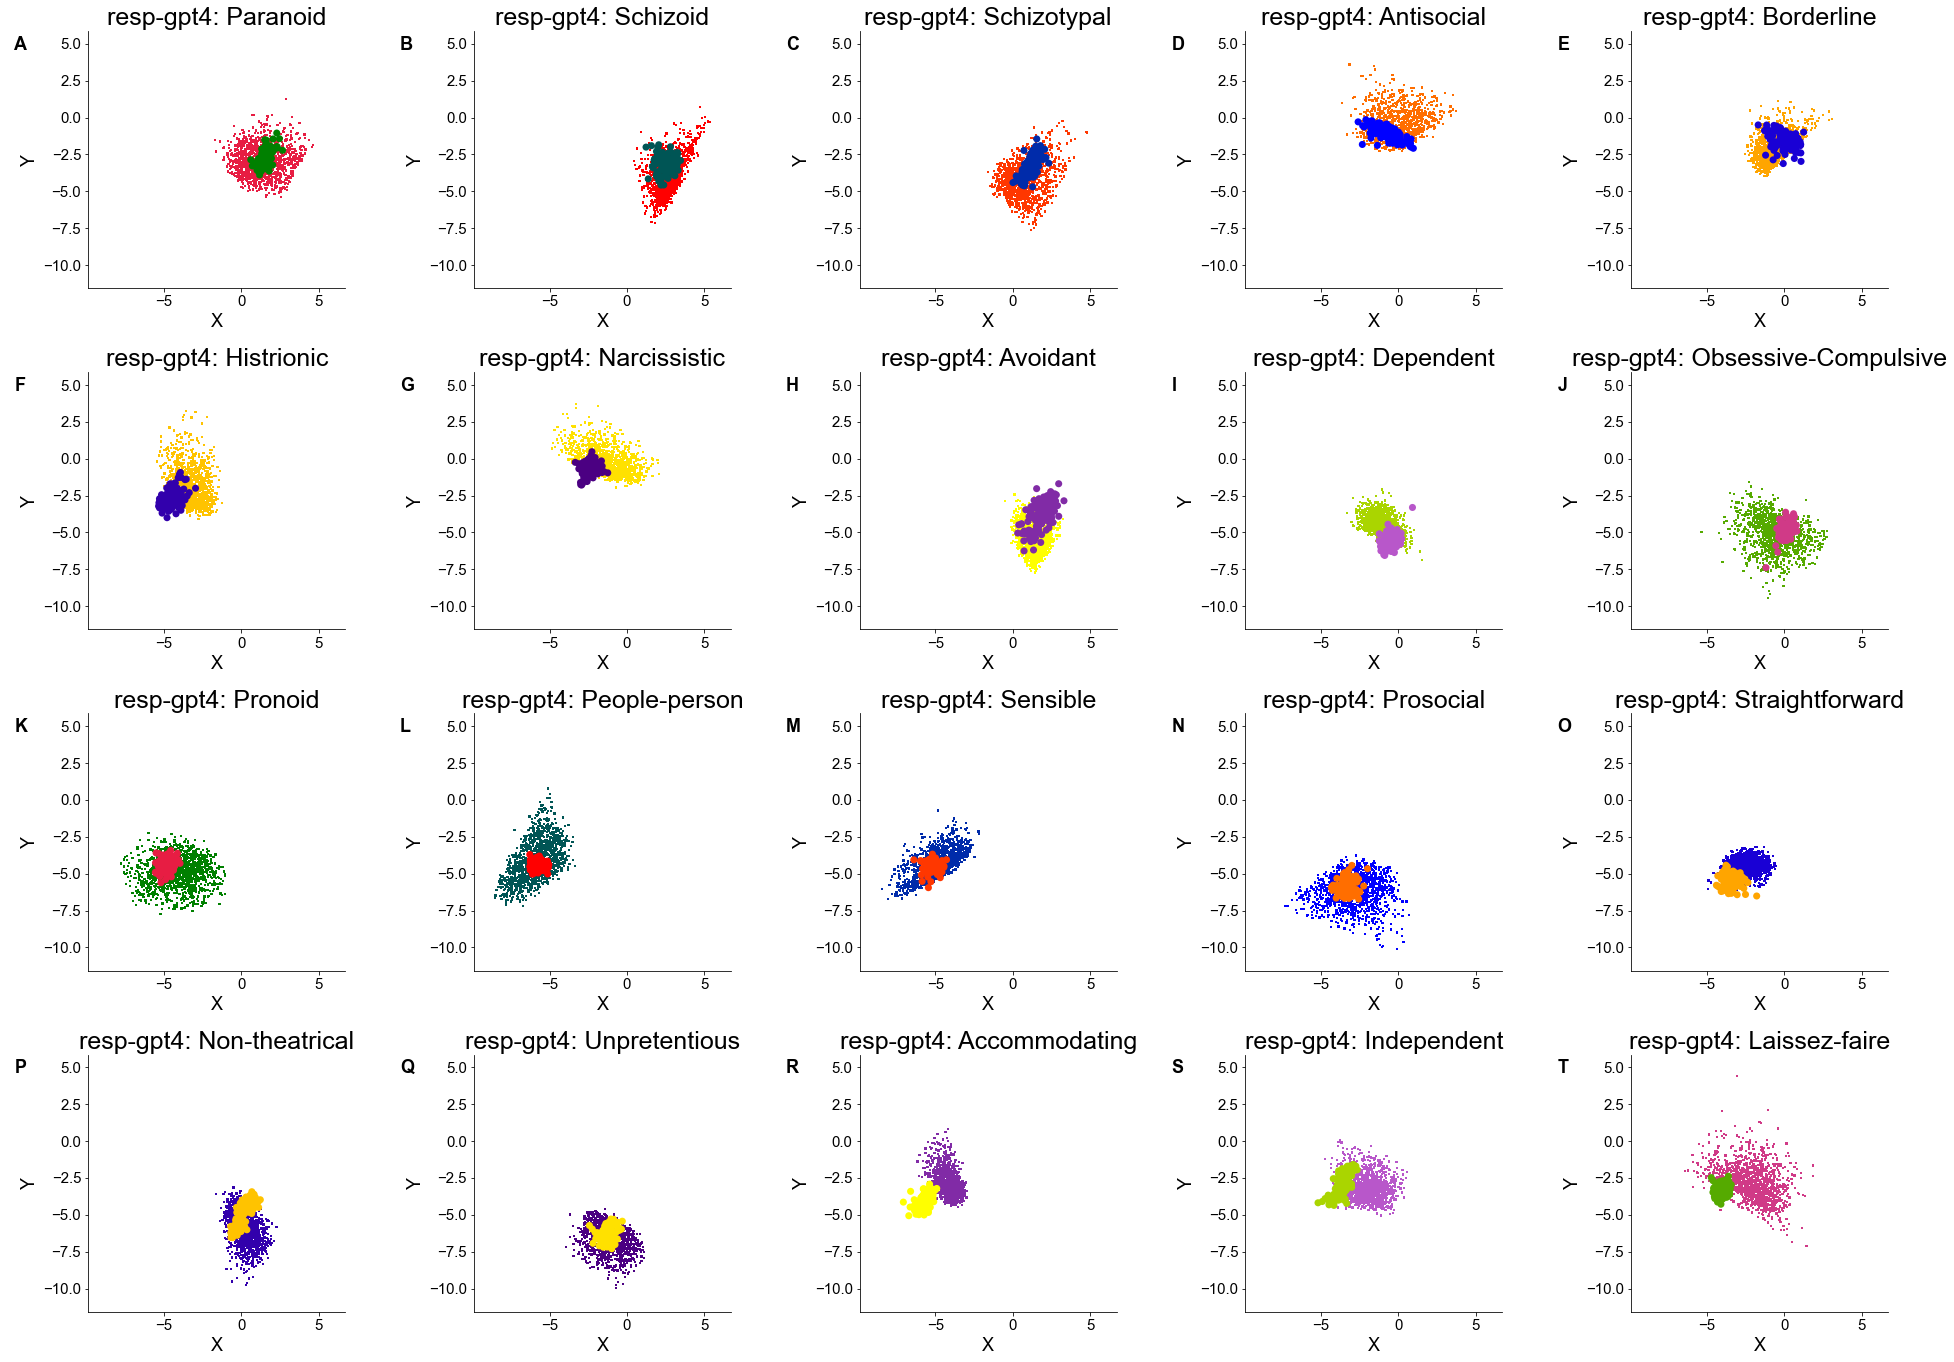

In [65]:
output_layout = (original_lda_imgs[0] * gpt4_lda_imgs[0])

for idx in range(1, 20):
    output_layout += (original_lda_imgs[idx] * gpt4_lda_imgs[idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(5)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\responses_seperated_gpt4.png", fmt="png")

output_layout


### Analysis


## IRR


In [66]:
irr_gpt4 = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_gpt4_all_infromation[df_gpt4_all_infromation.Label == label_idx]
    np_label_subset = df_label_subset.iloc[:, 0:40].to_numpy()

    irr = CalcInterRaterReliability(np_label_subset)
    irr_gpt4[label_idx] = irr
    print(f"{LABEL_NAMES[label_idx]}: {irr}")

Paranoid: 0.6561761811023622
Schizoid: 0.5928364911417323
Schizotypal: 0.680281126968504
Antisocial: 0.6860543799212598
Borderline: 0.6944635826771653
Histrionic: 0.6949680118110236
Narcissistic: 0.6879060039370078
Avoidant: 0.606496062992126
Dependent: 0.7152374507874015
Obsessive-Compulsive: 0.7708384596456693
Pronoid: 0.745044906496063
People-person: 0.7535063976377953
Sensible: 0.7709768700787402
Prosocial: 0.7123216043307087
Straightforward: 0.7876076525590551
Non-theatrical: 0.6985205462598425
Unpretentious: 0.695949187992126
Accommodating: 0.7215674212598425
Independent: 0.6880597933070867
Laissez-faire: 0.7200941190944882


## Root Mean Squared Prediction Error (againstg Personality Facttors)

In [67]:
rmspe_facttors_gpt4 = np.zeros((20, 4))

for label_idx in range(0, 20):
    df_label_subset = df_gpt4_all_infromation[df_gpt4_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    rmspe = RootMeanSquaredError(np_array = np_ocean_subset, np_predictor = OCEAN_estimate)
    rmspe_facttors_gpt4[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")

Paranoid: [0.05512415 0.11486038 0.10937511 0.04305638]
Schizoid: [0.03551243 0.11709371 0.05302748 0.11431863]
Schizotypal: [0.08483431 0.06455678 0.03052125 0.09558079]
Antisocial: [0.10687182 0.02248263 0.08489424 0.03991377]
Borderline: [0.10478911 0.03908095 0.11355237 0.06227616]
Histrionic: [0.06637323 0.0387033  0.06194365 0.2270186 ]
Narcissistic: [0.12043158 0.06193671 0.08307212 0.08684856]
Avoidant: [0.06465908 0.11952929 0.0513642  0.12512675]
Dependent: [0.0663206  0.05664873 0.10744374 0.08952269]
Obsessive-Compulsive: [0.15377307 0.05604072 0.10673683 0.09975525]
Pronoid: [0.10092154 0.10871918 0.0801075  0.04164283]
People-person: [0.08605049 0.13567683 0.06966297 0.20861429]
Sensible: [0.20799354 0.11259371 0.0415414  0.16593528]
Prosocial: [0.18256234 0.05960973 0.08061652 0.0737536 ]
Straightforward: [0.23461757 0.08706463 0.09388844 0.08264665]
Non-theatrical: [0.07795441 0.08641004 0.02739868 0.1363014 ]
Unpretentious: [0.15198381 0.07351408 0.07440913 0.05520289]

## RMSE of Euclidean Distance (against Personality)


In [68]:
rmspe_distance_gpt4 = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_gpt4_all_infromation[df_gpt4_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])

    # Get the distance between the labeld point and the instance
    np_distance_subset = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]):
        np_distance_subset[idx] = np.linalg.norm(np_ocean_subset[idx] - OCEAN_estimate)

    # Calc the avgerage prediction distance
    np_avg_distance = np.mean(np_distance_subset)
    
    rmspe = RootMeanSquaredError(np_array = np_distance_subset, np_predictor = np_avg_distance)
    rmspe_distance_gpt4[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")  


Paranoid: [0.04930561]
Schizoid: [0.04970519]
Schizotypal: [0.04289274]
Antisocial: [0.05158301]
Borderline: [0.0497387]
Histrionic: [0.06491997]
Narcissistic: [0.03992275]
Avoidant: [0.05541281]
Dependent: [0.0446229]
Obsessive-Compulsive: [0.05138644]
Pronoid: [0.04771302]
People-person: [0.02819415]
Sensible: [0.03383016]
Prosocial: [0.03367092]
Straightforward: [0.03857226]
Non-theatrical: [0.05393954]
Unpretentious: [0.04467252]
Accommodating: [0.04787346]
Independent: [0.05489598]
Laissez-faire: [0.03552866]


## RMSE Cosine Similarity (against Personality)


In [69]:
rmspe_cos_gpt4 = np.zeros(20)

for label_idx in range(0, 20):
    df_label_subset = df_gpt4_all_infromation[df_gpt4_all_infromation.Label == label_idx]
    np_ocean_subset = df_label_subset.iloc[:, 40:44].to_numpy()
    OCEAN_estimate = np.array(OCEAN_PROFILE_CORD[label_idx])
    
    # Calculate the Cosine Similarity for each personality result
    np_cos_similarity = np.zeros((np_ocean_subset.shape[0], 1))
    for idx in range(np_ocean_subset.shape[0]): 
        dot_product = np.dot(np_ocean_subset[idx], OCEAN_estimate)
        norm_instant = np.linalg.norm(np_ocean_subset[idx])
        norm_predict = np.linalg.norm(OCEAN_estimate)
        np_cos_similarity[idx] = dot_product/(norm_instant*norm_predict)

    # Calculate the Avg Cosine Similarity
    avg_cos_similarity = np.mean(np_cos_similarity)

    rmspe = RootMeanSquaredError(np_array = np_cos_similarity, np_predictor = avg_cos_similarity)
    rmspe_cos_gpt4[label_idx] = rmspe
    print(f"{LABEL_NAMES[label_idx]}: {rmspe}")   

Paranoid: [0.01054121]
Schizoid: [0.01199447]
Schizotypal: [0.00849975]
Antisocial: [0.00759853]
Borderline: [0.01063985]
Histrionic: [0.00618233]
Narcissistic: [0.00455866]
Avoidant: [0.01430563]
Dependent: [0.00630909]
Obsessive-Compulsive: [0.00925029]
Pronoid: [0.00293818]
People-person: [0.00274341]
Sensible: [0.00321185]
Prosocial: [0.00350584]
Straightforward: [0.00322222]
Non-theatrical: [0.01225921]
Unpretentious: [0.0053904]
Accommodating: [0.00351531]
Independent: [0.00316475]
Laissez-faire: [0.00404729]


# Final Analysis

In [70]:
irr_final = np.column_stack([irr_original, 
                            irr_turbo, 
                            irr_devinchi, 
                            irr_gpt4])

rmspe_facttors_final = np.dstack([rmspe_facttors_original,
                                       rmspe_facttors_turbo,
                                       rmspe_facttors_devinchi,
                                       rmspe_facttors_gpt4])

rmspe_distance_final = np.column_stack([rmspe_distance_original,
                                       rmspe_distance_turbo,
                                       rmspe_distance_devinchi,
                                       rmspe_distance_gpt4])

rmspe_cos_final = np.column_stack([rmspe_cos_original,
                                  rmspe_cos_turbo,
                                  rmspe_cos_devinchi,
                                  rmspe_cos_gpt4])

In [71]:
irr_final

array([[0.31061324, 0.45034141, 0.6291154 , 0.65617618],
       [0.36038119, 0.46757813, 0.54217827, 0.59283649],
       [0.28033668, 0.43448265, 0.6062623 , 0.68028113],
       [0.27388137, 0.4926704 , 0.6041923 , 0.68605438],
       [0.26229377, 0.46226624, 0.63307087, 0.69446358],
       [0.26472401, 0.56741203, 0.52837414, 0.69496801],
       [0.29657863, 0.51630167, 0.49378076, 0.687906  ],
       [0.32716443, 0.41252153, 0.66239542, 0.60649606],
       [0.29069884, 0.4390625 , 0.63909326, 0.71523745],
       [0.32677806, 0.55210691, 0.57270854, 0.77083846],
       [0.29205234, 0.55026759, 0.57078925, 0.74504491],
       [0.3210064 , 0.58254183, 0.52798659, 0.7535064 ],
       [0.29843919, 0.56875   , 0.62531373, 0.77097687],
       [0.29827876, 0.53453187, 0.59748093, 0.7123216 ],
       [0.28863651, 0.58023191, 0.63187438, 0.78760765],
       [0.30842188, 0.49974163, 0.58462106, 0.69852055],
       [0.30988192, 0.50478593, 0.57720534, 0.69594919],
       [0.28816949, 0.55230992,

In [72]:
rmspe_facttors_original

array([[0.31362519, 0.19546866, 0.15789995, 0.10140436],
       [0.1185193 , 0.16861751, 0.0678837 , 0.14356091],
       [0.26263762, 0.17098557, 0.09822313, 0.15744774],
       [0.18641686, 0.11811532, 0.1278547 , 0.12546437],
       [0.22223636, 0.10134396, 0.09883751, 0.12219517],
       [0.20616394, 0.11290848, 0.12029198, 0.11058792],
       [0.26818555, 0.1411957 , 0.14888348, 0.10430716],
       [0.18583144, 0.15269396, 0.08787041, 0.13094156],
       [0.18004666, 0.09941202, 0.08973506, 0.07255724],
       [0.26199979, 0.08745118, 0.15193588, 0.11225686],
       [0.21446201, 0.17448062, 0.14319723, 0.107228  ],
       [0.22424144, 0.24174591, 0.10575063, 0.21531834],
       [0.15175461, 0.16942707, 0.08561851, 0.1625061 ],
       [0.29844528, 0.14492826, 0.13888276, 0.123842  ],
       [0.11309979, 0.0825621 , 0.07577131, 0.0940581 ],
       [0.22170373, 0.1434239 , 0.1107406 , 0.10593   ],
       [0.28029574, 0.11002662, 0.1476052 , 0.09051279],
       [0.12951677, 0.12103581,

In [73]:
rmspe_facttors_final.T


array([[[0.31362519, 0.1185193 , 0.26263762, 0.18641686, 0.22223636,
         0.20616394, 0.26818555, 0.18583144, 0.18004666, 0.26199979,
         0.21446201, 0.22424144, 0.15175461, 0.29844528, 0.11309979,
         0.22170373, 0.28029574, 0.12951677, 0.25723458, 0.16034017],
        [0.19546866, 0.16861751, 0.17098557, 0.11811532, 0.10134396,
         0.11290848, 0.1411957 , 0.15269396, 0.09941202, 0.08745118,
         0.17448062, 0.24174591, 0.16942707, 0.14492826, 0.0825621 ,
         0.1434239 , 0.11002662, 0.12103581, 0.17947774, 0.14509975],
        [0.15789995, 0.0678837 , 0.09822313, 0.1278547 , 0.09883751,
         0.12029198, 0.14888348, 0.08787041, 0.08973506, 0.15193588,
         0.14319723, 0.10575063, 0.08561851, 0.13888276, 0.07577131,
         0.1107406 , 0.1476052 , 0.12580519, 0.1391741 , 0.18853187],
        [0.10140436, 0.14356091, 0.15744774, 0.12546437, 0.12219517,
         0.11058792, 0.10430716, 0.13094156, 0.07255724, 0.11225686,
         0.107228  , 0.21531834

In [74]:
rmspe_distance_final

array([[0.15611327, 0.07563693, 0.05651246, 0.04930561],
       [0.1026219 , 0.0619949 , 0.06295034, 0.04970519],
       [0.12382426, 0.06138682, 0.07188906, 0.04289274],
       [0.10381493, 0.05637243, 0.08454761, 0.05158301],
       [0.09840303, 0.07770418, 0.05742615, 0.0497387 ],
       [0.091319  , 0.04136025, 0.07092089, 0.06491997],
       [0.12744601, 0.05207659, 0.06754427, 0.03992275],
       [0.11139667, 0.0753537 , 0.05929015, 0.05541281],
       [0.07956382, 0.05022742, 0.05110443, 0.0446229 ],
       [0.10623357, 0.04849131, 0.04791913, 0.05138644],
       [0.1066303 , 0.04292352, 0.05664536, 0.04771302],
       [0.12655927, 0.04608715, 0.04414985, 0.02819415],
       [0.10356987, 0.04466344, 0.04212837, 0.03383016],
       [0.12677303, 0.04423077, 0.05142794, 0.03367092],
       [0.05694764, 0.04360933, 0.05131097, 0.03857226],
       [0.11584455, 0.0620094 , 0.05468788, 0.05393954],
       [0.12215494, 0.05543527, 0.05772396, 0.04467252],
       [0.07935015, 0.04254034,

In [75]:
rmspe_cos_final

array([[0.03592881, 0.01658083, 0.01125702, 0.01054121],
       [0.05206827, 0.01579538, 0.01167488, 0.01199447],
       [0.02669195, 0.00949641, 0.00781104, 0.00849975],
       [0.03925398, 0.01119706, 0.02584781, 0.00759853],
       [0.02328745, 0.01309883, 0.0089055 , 0.01063985],
       [0.01359518, 0.00677552, 0.01207157, 0.00618233],
       [0.02932391, 0.01218648, 0.01607463, 0.00455866],
       [0.01718491, 0.01184688, 0.00881903, 0.01430563],
       [0.01592377, 0.00530067, 0.00465069, 0.00630909],
       [0.02225236, 0.01265184, 0.00593955, 0.00925029],
       [0.01398547, 0.0048908 , 0.00736206, 0.00293818],
       [0.01153754, 0.0059747 , 0.00821673, 0.00274341],
       [0.00772805, 0.00363406, 0.00802636, 0.00321185],
       [0.0188734 , 0.00376134, 0.00533414, 0.00350584],
       [0.00760312, 0.00418578, 0.00611925, 0.00322222],
       [0.01727966, 0.00806188, 0.00682729, 0.01225921],
       [0.02108425, 0.00517523, 0.00668174, 0.0053904 ],
       [0.01000535, 0.00436762,

In [76]:
print(f"{turbo_accuracy}, {devinchi_accuracy}, {gpt4_accuracy}")

0.13671875, 0.0890625, 0.625


In [77]:
first_example_idx = 1
second_example_idx = 9
third_example_idx = 15

In [78]:
output_layout = (original_lda_imgs[first_example_idx] * devinchi_lda_imgs[first_example_idx]) + (original_lda_imgs[first_example_idx] * turbo_lda_imgs[first_example_idx]) + (original_lda_imgs[first_example_idx] * gpt4_lda_imgs[first_example_idx]) + (original_lda_imgs[second_example_idx] * devinchi_lda_imgs[second_example_idx]) + (original_lda_imgs[second_example_idx] * turbo_lda_imgs[second_example_idx]) + (original_lda_imgs[second_example_idx] * gpt4_lda_imgs[second_example_idx]) + (original_lda_imgs[third_example_idx] * devinchi_lda_imgs[third_example_idx]) + (original_lda_imgs[third_example_idx] * turbo_lda_imgs[third_example_idx]) + (original_lda_imgs[third_example_idx] * gpt4_lda_imgs[third_example_idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(3)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\resp_examples.png", fmt="png")

output_layout

:Layout
   .Overlay.I    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.II   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.III  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IV   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.V    :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VI   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VII  :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.VIII :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)
   .Overlay.IX   :Overlay
      .Scatter.I  :Scatter   [X]   (Y,Label)
      .Scatter.II :Scatter   [X]   (Y,Label)

:Layout
   .Overlay.I    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.II   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.III  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IV   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.V    :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VI   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VII  :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.VIII :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
   .Overlay.IX   :Overlay
      .Scatter.I  :Scatter   [Alpha]   (Beta,Label)
      .Scatter.II :Scatter   [Alpha]   (Beta,Label)
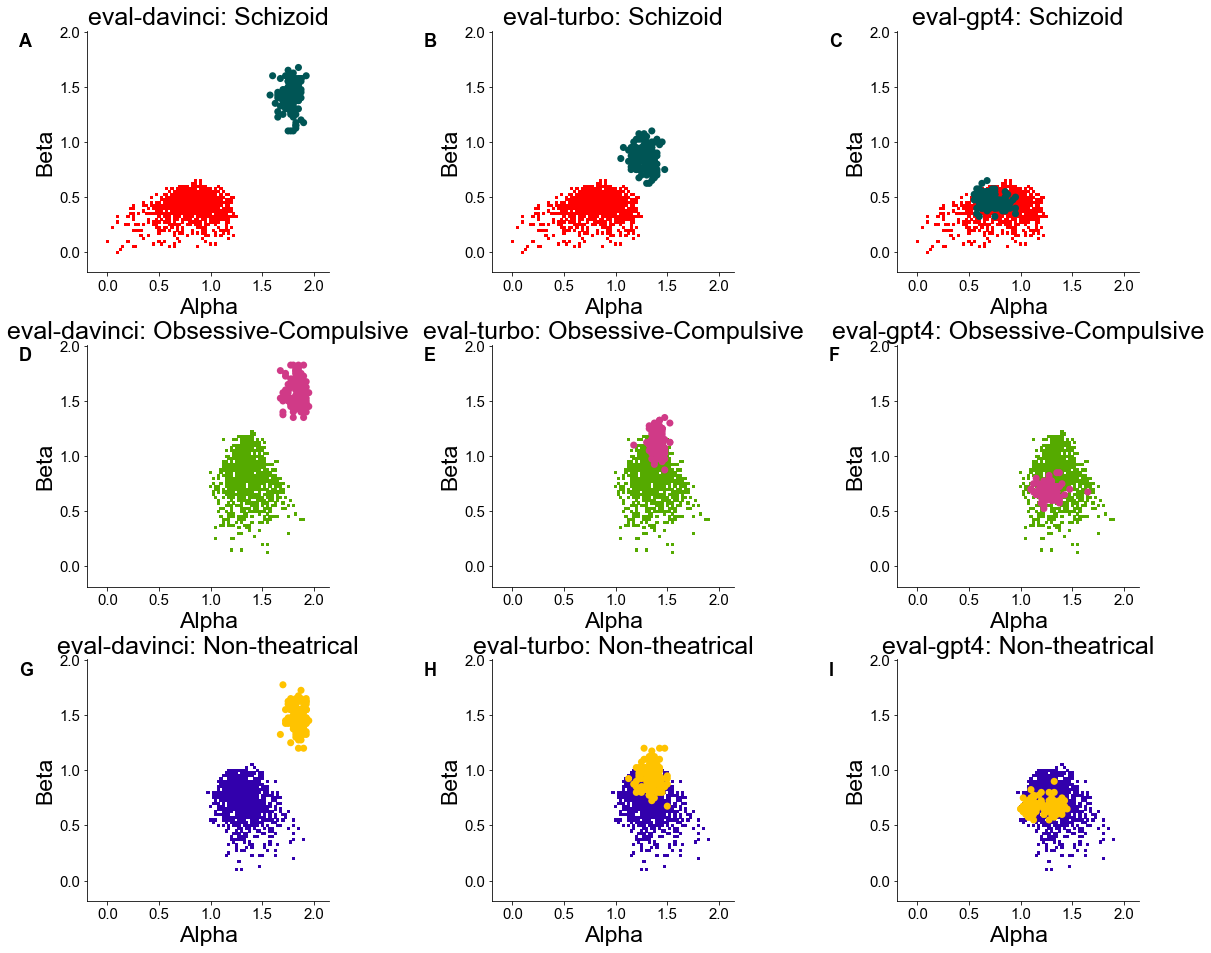

In [79]:
output_layout = (original_eval_imgs[first_example_idx] * devinchi_eval_imgs[first_example_idx]) + (original_eval_imgs[first_example_idx] * turbo_eval_imgs[first_example_idx]) + (original_eval_imgs[first_example_idx] * gpt4_eval_imgs[first_example_idx]) + (original_eval_imgs[second_example_idx] * devinchi_eval_imgs[second_example_idx]) + (original_eval_imgs[second_example_idx] * turbo_eval_imgs[second_example_idx]) + (original_eval_imgs[second_example_idx] * gpt4_eval_imgs[second_example_idx]) + (original_eval_imgs[third_example_idx] * devinchi_eval_imgs[third_example_idx]) + (original_eval_imgs[third_example_idx] * turbo_eval_imgs[third_example_idx]) + (original_eval_imgs[third_example_idx] * gpt4_eval_imgs[third_example_idx])

output_layout.opts(fig_inches=5, fig_bounds=(0, 0, 1, 1)).cols(3)

hv.save(output_layout, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\eval_examples.png", fmt="png")

output_layout

In [80]:
df_all_infromation_subset.insert(loc=len(df_all_infromation_subset.columns), column="Model", value=np.zeros(len(df_all_infromation_subset.index)), allow_duplicates=True)
df_all_infromation_subset["Model"] = df_all_infromation_subset["Model"].astype(int)
df_all_infromation_subset["Model"] = df_all_infromation_subset["Model"].astype('category')
df_all_infromation_subset["Model"] = df_all_infromation_subset["Model"].cat.rename_categories({0:"Baseline"})
df_all_infromation_subset

#df_all_infromation_subset.drop(labels="Model", axis=1, inplace=True)
#df_all_infromation_subset

E1  E2  E3  E4  E5  E6  E7  E8  E9  E10  ...  O9  O10  Openness  \
55937    1   4   1   4   2   4   1   5   1    5  ...   4    4     0.675   
596904   1   5   3   5   1   2   1   5   4    5  ...   5    3     1.000   
222337   1   5   2   5   1   4   1   4   2    5  ...   5    5     0.875   
41183    1   5   1   5   1   5   1   5   1    5  ...   4    5     0.775   
9634     4   4   2   5   2   5   5   4   4    3  ...   3    3     0.525   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ...       ...   
243343   3   4   2   4   2   2   2   4   4    5  ...   2    2     0.850   
511358   1   3   4   5   3   2   2   4   2    5  ...   2    1     0.725   
42786    4   1   4   1   4   2   4   2   5    2  ...   2    2     0.875   
372474   2   2   3   3   3   2   2   3   3    3  ...   2    3     0.775   
286980   3   4   5   1   1   5   3   1   4    1  ...   3    2     0.625   

        Conscientiousness  Extraversion  Agreeableness  Alpha   Beta  Label  \
55937               0.800         0.100          0.225  1.025  0.775      0   
596904              0.900         0.200          0.000  0.900  1.200      0   
222337              0.975         0.100          0.325  1.300  0.975      0   
41183               0.925         0.000          0.050  0.975  0.775      0   
9634                0.550         0.400          0.175  0.725  0.925      0   
...                   ...           ...            ...    ...    ...    ...   
243343              0.300         0.350          0.650  0.950  1.200     19   
511358              0.200         0.325          0.800  1.000  1.050     19   
42786               0.225         0.825          0.750  0.975  1.700     19   
372474              0.425         0.500          0.575  1.000  1.275     19   
286980              0.075         0.600          0.550  0.625  1.225     19   

           Model  
55937   Baseline  
596904  Baseline  
222337  Baseline  
41183   Baseline  
9634    Baseline  
...          ...  
243343  Baseline  
511358  Baseline  
42786   Baseline  
372474  Baseline  
286980  Baseline  

[24400 rows x 48 columns]

In [81]:
df_all_infromation_subset["Label"] = df_all_infromation_subset["Label"].astype('category')
df_all_infromation_subset["Label"] = df_all_infromation_subset["Label"].cat.rename_categories({0:"Paranoid", 
                                                                                           1:"Schizoid ", 
                                                                                           2:"Schizotypal", 
                                                                                           3:"Antisocial ", 
                                                                                           4:"Borderline", 
                                                                                           5:"Histrionic", 
                                                                                           6:"Narcissistic", 
                                                                                           7:"Avoidant", 
                                                                                           8:"Dependent", 
                                                                                           9:"Obsessive-Compulsive", 
                                                                                           10:"Pronoid", 
                                                                                           11:"People-person", 
                                                                                           12:"Sensible", 
                                                                                           13:"Prosocial", 
                                                                                           14:"Straightforward", 
                                                                                           15:"Non-theatrical", 
                                                                                           16:"Unpretentious", 
                                                                                           17:"Accommodating", 
                                                                                           18:"Independent", 
                                                                                           19:"Laissez-faire"})

df_all_infromation_subset ["Label"] = df_all_infromation_subset["Label"].astype('category')
df_all_infromation_subset["Label"] = df_all_infromation_subset["Label"].cat.rename_categories({0:"Paranoid", 
                                                                                           1:"Schizoid ", 
                                                                                           2:"Schizotypal", 
                                                                                           3:"Antisocial ", 
                                                                                           4:"Borderline", 
                                                                                           5:"Histrionic", 
                                                                                           6:"Narcissistic", 
                                                                                           7:"Avoidant", 
                                                                                           8:"Dependent", 
                                                                                           9:"Obsessive-Compulsive", 
                                                                                           10:"Pronoid", 
                                                                                           11:"People-person", 
                                                                                           12:"Sensible", 
                                                                                           13:"Prosocial", 
                                                                                           14:"Straightforward", 
                                                                                           15:"Non-theatrical", 
                                                                                           16:"Unpretentious", 
                                                                                           17:"Accommodating", 
                                                                                           18:"Independent", 
                                                                                           19:"Laissez-faire"})

df_turbo_all_infromation ["Label"] = df_turbo_all_infromation["Label"].astype('category')
df_turbo_all_infromation["Label"] = df_turbo_all_infromation["Label"].cat.rename_categories({0:"Paranoid", 
                                                                                           1:"Schizoid ", 
                                                                                           2:"Schizotypal", 
                                                                                           3:"Antisocial ", 
                                                                                           4:"Borderline", 
                                                                                           5:"Histrionic", 
                                                                                           6:"Narcissistic", 
                                                                                           7:"Avoidant", 
                                                                                           8:"Dependent", 
                                                                                           9:"Obsessive-Compulsive", 
                                                                                           10:"Pronoid", 
                                                                                           11:"People-person", 
                                                                                           12:"Sensible", 
                                                                                           13:"Prosocial", 
                                                                                           14:"Straightforward", 
                                                                                           15:"Non-theatrical", 
                                                                                           16:"Unpretentious", 
                                                                                           17:"Accommodating", 
                                                                                           18:"Independent", 
                                                                                           19:"Laissez-faire"})


df_devinchi_all_infromation ["Label"] = df_devinchi_all_infromation["Label"].astype('category')
df_devinchi_all_infromation["Label"] = df_devinchi_all_infromation["Label"].cat.rename_categories({0:"Paranoid", 
                                                                                           1:"Schizoid ", 
                                                                                           2:"Schizotypal", 
                                                                                           3:"Antisocial ", 
                                                                                           4:"Borderline", 
                                                                                           5:"Histrionic", 
                                                                                           6:"Narcissistic", 
                                                                                           7:"Avoidant", 
                                                                                           8:"Dependent", 
                                                                                           9:"Obsessive-Compulsive", 
                                                                                           10:"Pronoid", 
                                                                                           11:"People-person", 
                                                                                           12:"Sensible", 
                                                                                           13:"Prosocial", 
                                                                                           14:"Straightforward", 
                                                                                           15:"Non-theatrical", 
                                                                                           16:"Unpretentious", 
                                                                                           17:"Accommodating", 
                                                                                           18:"Independent", 
                                                                                           19:"Laissez-faire"})


df_gpt4_all_infromation ["Label"] = df_gpt4_all_infromation["Label"].astype('category')
df_gpt4_all_infromation["Label"] = df_gpt4_all_infromation["Label"].cat.rename_categories({0:"Paranoid", 
                                                                                           1:"Schizoid ", 
                                                                                           2:"Schizotypal", 
                                                                                           3:"Antisocial ", 
                                                                                           4:"Borderline", 
                                                                                           5:"Histrionic", 
                                                                                           6:"Narcissistic", 
                                                                                           7:"Avoidant", 
                                                                                           8:"Dependent", 
                                                                                           9:"Obsessive-Compulsive", 
                                                                                           10:"Pronoid", 
                                                                                           11:"People-person", 
                                                                                           12:"Sensible", 
                                                                                           13:"Prosocial", 
                                                                                           14:"Straightforward", 
                                                                                           15:"Non-theatrical", 
                                                                                           16:"Unpretentious", 
                                                                                           17:"Accommodating", 
                                                                                           18:"Independent", 
                                                                                           19:"Laissez-faire"})

DF_PROFILES ["Label"] = DF_PROFILES["Label"].astype('category')
DF_PROFILES["Label"] = DF_PROFILES["Label"].cat.rename_categories({0:"Paranoid", 
                                                                1:"Schizoid ", 
                                                                2:"Schizotypal", 
                                                                3:"Antisocial ", 
                                                                4:"Borderline", 
                                                                5:"Histrionic", 
                                                                6:"Narcissistic", 
                                                                7:"Avoidant", 
                                                                8:"Dependent", 
                                                                9:"Obsessive-Compulsive", 
                                                                10:"Pronoid", 
                                                                11:"People-person", 
                                                                12:"Sensible", 
                                                                13:"Prosocial", 
                                                                14:"Straightforward", 
                                                                15:"Non-theatrical", 
                                                                16:"Unpretentious", 
                                                                17:"Accommodating", 
                                                                18:"Independent", 
                                                                19:"Laissez-faire"})

In [82]:
df_turbo_all_infromation.insert(loc=len(df_turbo_all_infromation.columns), column="Model", value=np.full(len(df_turbo_all_infromation.index), 1), allow_duplicates=True)
df_turbo_all_infromation["Model"] = df_turbo_all_infromation["Model"].astype(int)
df_turbo_all_infromation["Model"] = df_turbo_all_infromation["Model"].astype('category')
df_turbo_all_infromation["Model"] = df_turbo_all_infromation["Model"].cat.rename_categories({1:"Turbo"})


df_devinchi_all_infromation.insert(loc=len(df_devinchi_all_infromation.columns), column="Model", value=np.full(len(df_devinchi_all_infromation.index), 2), allow_duplicates=True)
df_devinchi_all_infromation["Model"] = df_devinchi_all_infromation["Model"].astype(int)
df_devinchi_all_infromation["Model"] = df_devinchi_all_infromation["Model"].astype('category')
df_devinchi_all_infromation["Model"] = df_devinchi_all_infromation["Model"].cat.rename_categories({2:"Davinci"})

df_gpt4_all_infromation.insert(loc=len(df_gpt4_all_infromation.columns), column="Model", value=np.full(len(df_gpt4_all_infromation.index), 3), allow_duplicates=True)
df_gpt4_all_infromation["Model"] = df_gpt4_all_infromation["Model"].astype(int)
df_gpt4_all_infromation["Model"] = df_gpt4_all_infromation["Model"].astype('category')
df_gpt4_all_infromation["Model"] = df_gpt4_all_infromation["Model"].cat.rename_categories({3:"GPT-4"})

In [84]:
df_all_infromation =  pd.concat([df_all_infromation_subset, df_devinchi_all_infromation, df_turbo_all_infromation, df_gpt4_all_infromation])

In [85]:
violin_Openness = hv.Violin(df_all_infromation, ["Model", "Label"], ["Openness"]).opts(widths = 1.25)
point_Openness = hv.Scatter(np.concatenate((NP_OCEAN_PROFILES[:, 0], NP_OCEAN_PROFILES[:, 0], NP_OCEAN_PROFILES[:, 0], NP_OCEAN_PROFILES[:, 0]))).opts(color='Magenta', s=200)
Openness_plot = (violin_Openness * point_Openness).opts(aspect=5, fig_size=1800, xrotation=90, fontscale=4)

hv.save(Openness_plot, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\violin_Openness.png", fmt="png")

violin_Conscientiousness = hv.Violin(df_all_infromation, ["Model", "Label"], ["Conscientiousness"]).opts(widths = 1.25)
point_Conscientiousness = hv.Scatter(np.concatenate((NP_OCEAN_PROFILES[:, 1], NP_OCEAN_PROFILES[:, 1], NP_OCEAN_PROFILES[:, 1], NP_OCEAN_PROFILES[:, 1]))).opts(color='Magenta', s=200)
Conscientiousness_plot = (violin_Conscientiousness * point_Conscientiousness).opts(aspect=5, fig_size=1800, xrotation=90, fontscale=4)

hv.save(Conscientiousness_plot, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\violin_Conscientiousness.png", fmt="png")


violin_Extraversion = hv.Violin(df_all_infromation, ["Model", "Label"], ["Extraversion"]).opts(widths = 1.25)
point_Extraversion = hv.Scatter(np.concatenate((NP_OCEAN_PROFILES[:, 2], NP_OCEAN_PROFILES[:, 2], NP_OCEAN_PROFILES[:, 2], NP_OCEAN_PROFILES[:, 2]))).opts(color='Magenta', s=200)
Extraversion_plot = (violin_Extraversion * point_Extraversion).opts(aspect=5, fig_size=1800, xrotation=90, fontscale=4)

hv.save(Extraversion_plot, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\violin_Extraversion.png", fmt="png")

violin_Agreeableness = hv.Violin(df_all_infromation, ["Model", "Label"], ["Agreeableness"]).opts(widths = 1.25)
point_Agreeableness = hv.Scatter(np.concatenate((NP_OCEAN_PROFILES[:, 3], NP_OCEAN_PROFILES[:, 3], NP_OCEAN_PROFILES[:, 3], NP_OCEAN_PROFILES[:, 3]))).opts(color='Magenta', s=200)
Agreeableness_plot = (violin_Agreeableness * point_Agreeableness).opts(aspect=5, fig_size=1800, xrotation=90, fontscale=4)

hv.save(Agreeableness_plot, r"C:\Users\Jake Klinkert\Documents\School\HumIn Game Lab\APF\Papers\LLM\personality\notebooks\Big4\results\images\violin_Agreeableness.png", fmt="png")